# <center><strong>Music Recommendation System using Spotify</strong></center>


###### **By Mohamed Jamyl**

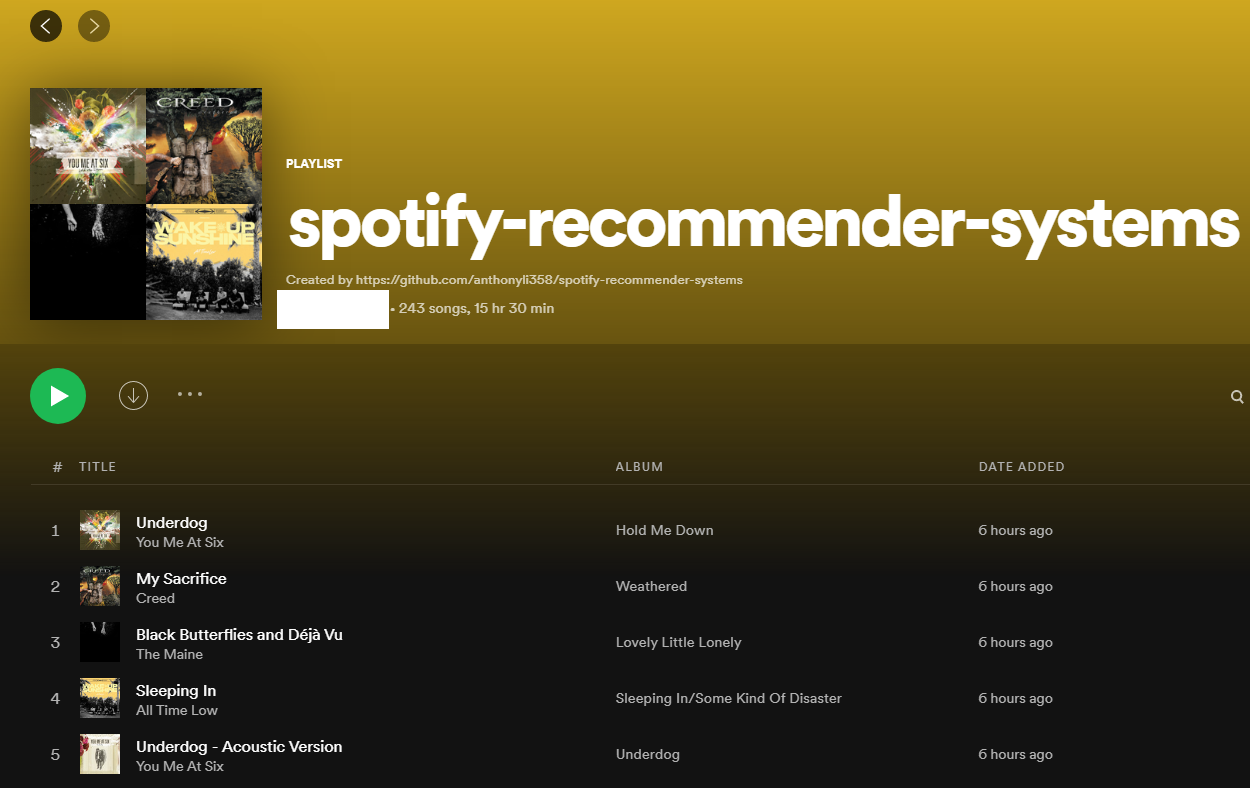

In [1]:
from IPython.display import Image
Image(filename='sp.png')

--------------------------------
--------------------------------
--------------------------------

## **Import Libraries**


In [2]:
from pandas import read_csv, DataFrame, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, plot, subplots, bar, scatter
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style
from numpy import log, inf
from seaborn import set, kdeplot, heatmap, boxplot, regplot, countplot, histplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

---------------------------------------
---------------------------------------
---------------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [3]:
df = read_csv('Music Recommendation System using Spotify Dataset.csv')

In [4]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,5/29/2020,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,10/23/2020,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,11/3/2020,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,1/17/2020,0.3080,75.055


In [5]:
df.shape

(170653, 19)

In [6]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [9]:
df.duplicated().sum()

0

-----------------------------------------

### **Basic Statistical Overview**
- Summary Statistical : **describe()**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,170653.0,0.528587,0.263171,0.0,0.3170,0.540000,0.7470,1.000
year,170653.0,1976.787241,25.917853,1921.0,1956.0000,1977.000000,1999.0000,2020.000
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,170653.0,230948.310666,126118.414668,5108.0,169827.0000,207467.000000,262400.0000,5403500.000
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
explicit,170653.0,0.084575,0.278249,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
key,170653.0,5.199844,3.515094,0.0,2.0000,5.000000,8.0000,11.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000


In [ ]:
df.select_dtypes(include='object').describe()

,artists,id,name,release_date
count,170653,170653,170653,170653
unique,34088,170653,133637,11244
top,['Эрнест Хемингуэй'],4BJqT0PrAfrxzMOxytFOIz,White Christmas,1945
freq,1211,1,73,1446


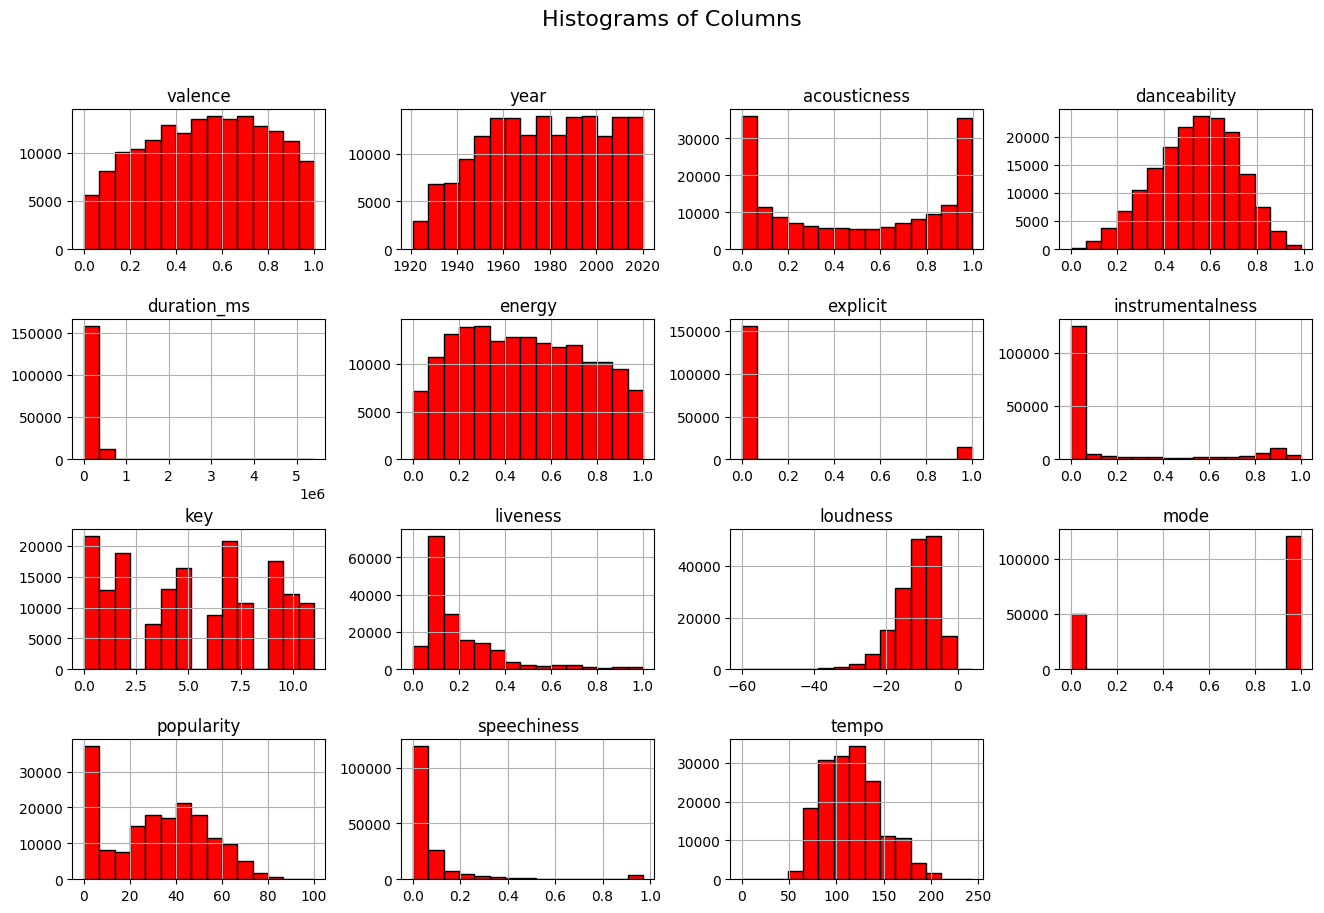

In [ ]:
df.hist(bins=15, figsize=(16, 10), color='red', edgecolor='black')

# Set titles and labels for each subplot
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  # Add space between plots
show()

--------------------------------

- Summary Statistical : **value_counts()**

In [ ]:
df["release_date"].value_counts()

release_date
1945         1446
1949         1247
1948         1127
1926         1099
1935         1078
             ... 
5/18/1973       1
10/8/1974       1
4/22/1974       1
4/19/1974       1
11/3/2020       1
Name: count, Length: 11244, dtype: int64

In [ ]:
df['year'].value_counts()

year
2018    2103
2020    2030
2011    2017
2010    2016
2014    2005
        ... 
1925     278
1924     236
1923     185
1921     150
1922      71
Name: count, Length: 100, dtype: int64

In [ ]:
df['explicit'].value_counts()

explicit
0    156220
1     14433
Name: count, dtype: int64

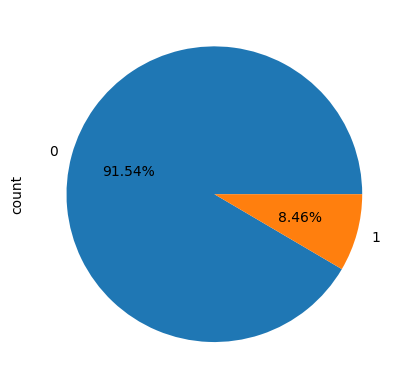

In [ ]:
df['explicit'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
top20_songs=df['name'].value_counts().sort_values(ascending=False)[:20]
top20_songs

name
White Christmas       73
Winter Wonderland     63
Summertime            56
Jingle Bells          53
Overture              46
Silent Night          45
Home                  40
The Christmas Song    36
Silver Bells          36
Sleigh Ride           35
You                   33
Stay                  33
Hold On               31
Runaway               31
Intro                 31
Autumn Leaves         31
Forever               31
I Love You            30
Stardust              30
Angel                 30
Name: count, dtype: int64

In [ ]:
nameDict = top20_songs.to_dict()
nameDict

{'White Christmas': 73,
 'Winter Wonderland': 63,
 'Summertime': 56,
 'Jingle Bells': 53,
 'Overture': 46,
 'Silent Night': 45,
 'Home': 40,
 'The Christmas Song': 36,
 'Silver Bells': 36,
 'Sleigh Ride': 35,
 'You': 33,
 'Stay': 33,
 'Hold On': 31,
 'Runaway': 31,
 'Intro': 31,
 'Autumn Leaves': 31,
 'Forever': 31,
 'I Love You': 30,
 'Stardust': 30,
 'Angel': 30}

In [ ]:
song_names = [f'{i}' for i in top20_songs.keys()]
song_names

['White Christmas',
 'Winter Wonderland',
 'Summertime',
 'Jingle Bells',
 'Overture',
 'Silent Night',
 'Home',
 'The Christmas Song',
 'Silver Bells',
 'Sleigh Ride',
 'You',
 'Stay',
 'Hold On',
 'Runaway',
 'Intro',
 'Autumn Leaves',
 'Forever',
 'I Love You',
 'Stardust',
 'Angel']

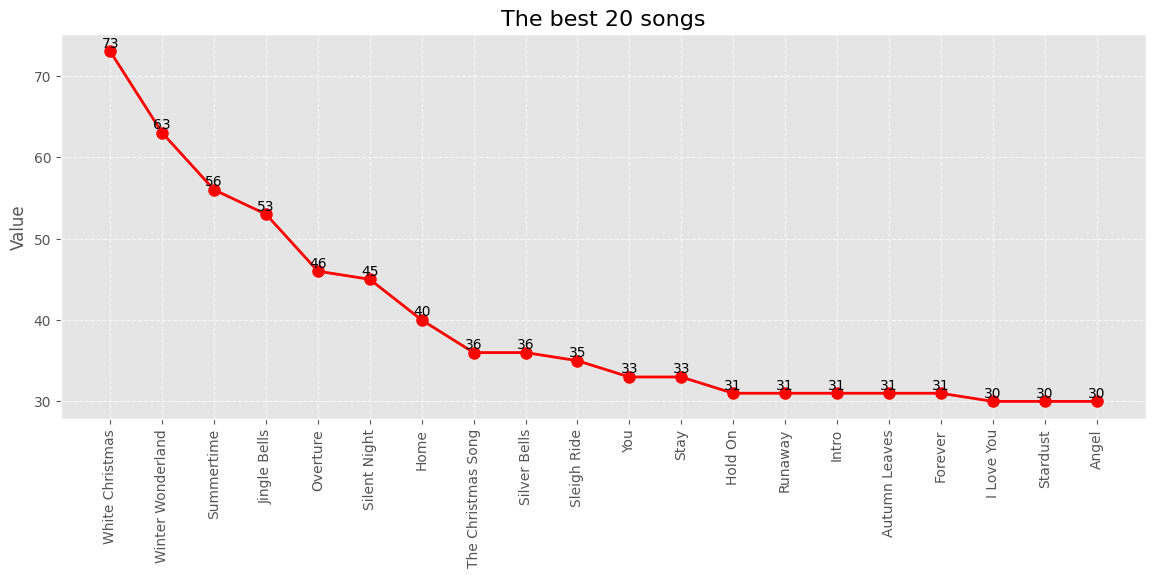

In [ ]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top20_songs, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
xticks(ticks=range(len(song_names)), labels=song_names, rotation=90, fontsize=10)
title('The best 20 songs', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top20_songs):
    text(i, value + 0.5, str(round(value, 2)), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)
show()

------------------------------

In [ ]:
top20MeanPopularity=[df[df['name']==i]['popularity'].mean() for i in list(top20_songs.keys())]
top20MeanPopularity.sort()
top20MeanPopularity

[11.23913043478261,
 23.6,
 26.92452830188679,
 27.15068493150685,
 29.451612903225808,
 29.857142857142858,
 30.11111111111111,
 30.8,
 30.841269841269842,
 30.86111111111111,
 31.822222222222223,
 35.0,
 41.83870967741935,
 45.86666666666667,
 47.54838709677419,
 47.825,
 47.878787878787875,
 48.83870967741935,
 49.0,
 49.24242424242424]

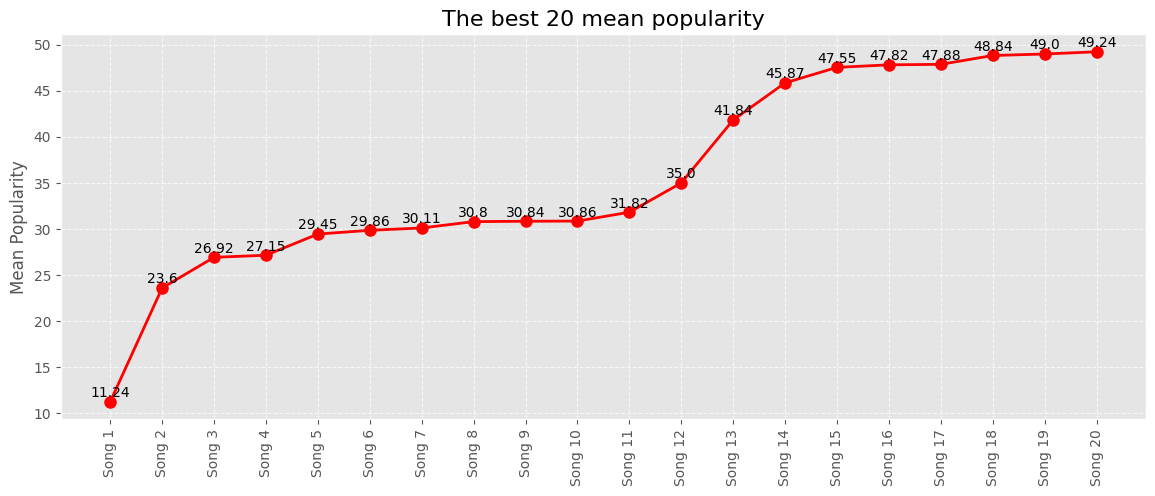

In [ ]:
song_names = [f'Song {i+1}' for i in range(len(top20MeanPopularity))]

style.use('ggplot')
figure(figsize=(14, 5))

plot(top20MeanPopularity, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
xticks(ticks=range(len(song_names)), labels=song_names, rotation=90, fontsize=10)
title('The best 20 mean popularity', fontsize=16)
ylabel('Mean Popularity', fontsize=12)

for i, value in enumerate(top20MeanPopularity):
    text(i, value + 0.5, str(round(value, 2)), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)
show()

---------------------------------------

In [ ]:
top20_artist = df['artists'].value_counts().sort_values(ascending=False)[:20]
top20_artist

artists
['Эрнест Хемингуэй']                   1211
['Эрих Мария Ремарк']                  1068
['Francisco Canaro']                    942
['Frank Sinatra']                       630
['Ignacio Corsini']                     628
['Elvis Presley']                       504
['Johnny Cash']                         484
['Bob Dylan']                           474
['The Rolling Stones']                  471
['The Beach Boys']                      455
['Francisco Canaro', 'Charlo']          453
['Fleetwood Mac']                       437
['Dean Martin']                         420
['The Beatles']                         407
['Queen']                               406
['Billie Holiday']                      404
['Georgette Heyer', 'Irina Salkow']     395
['Miles Davis']                         394
['Ella Fitzgerald']                     365
['Lead Belly']                          337
Name: count, dtype: int64

---------------------------------------
---------------------------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

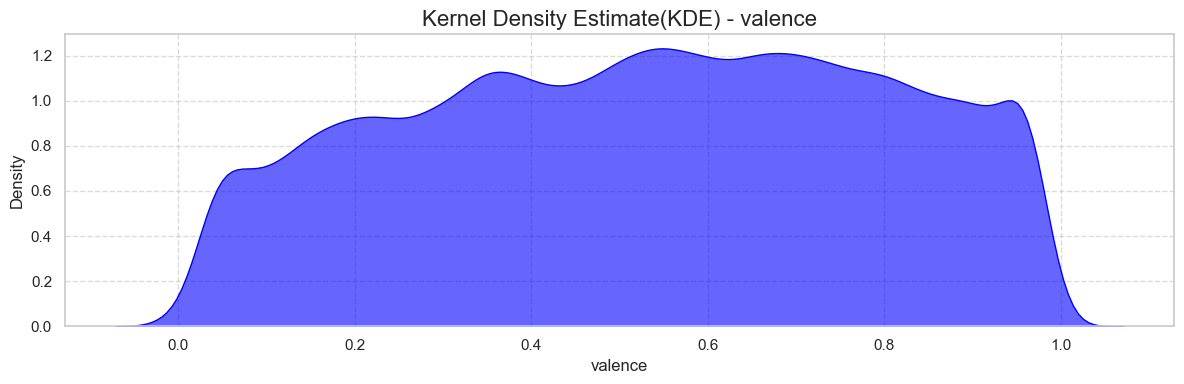

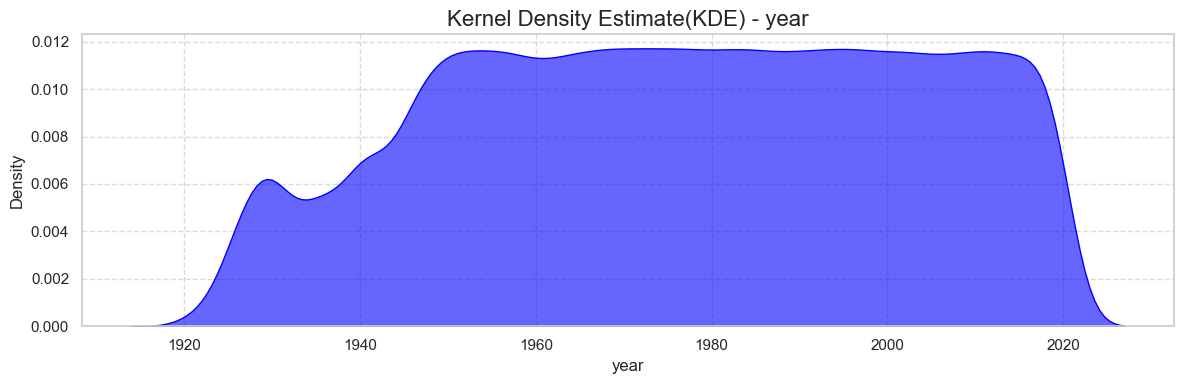

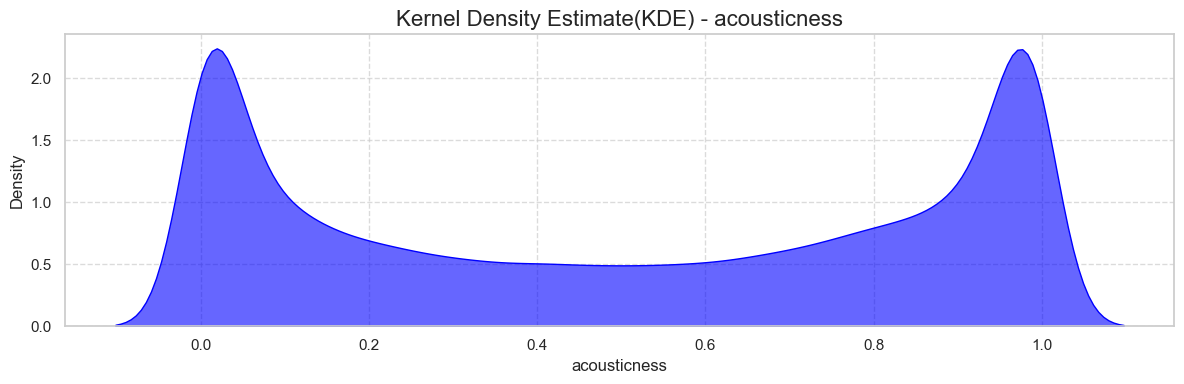

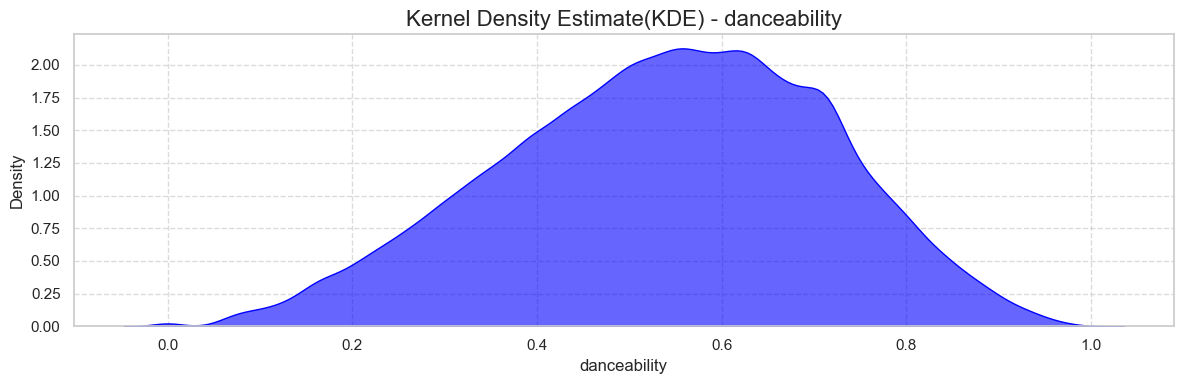

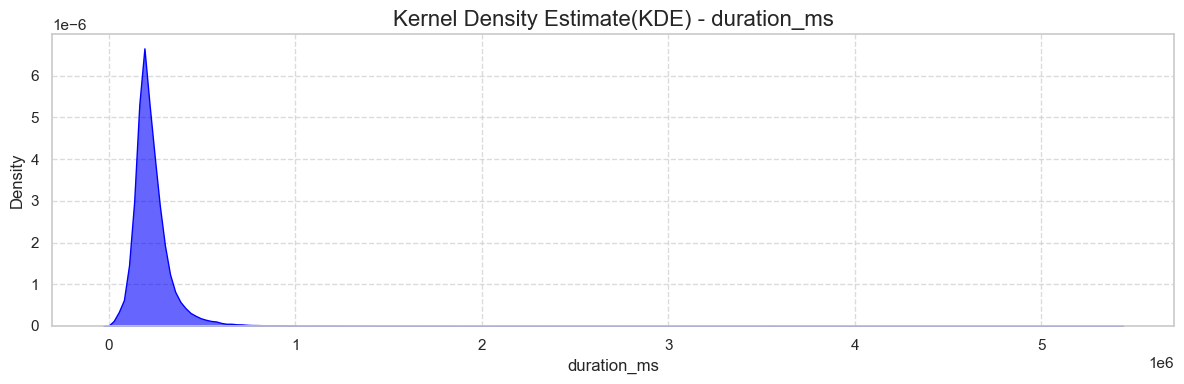

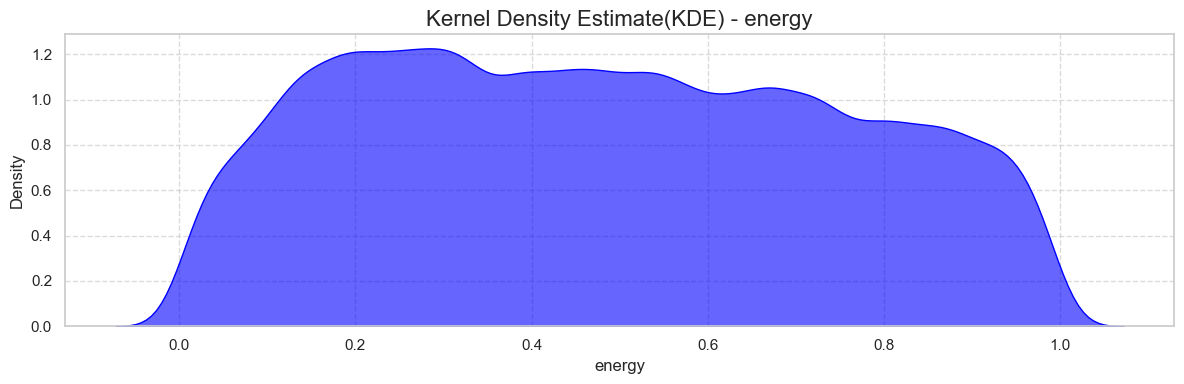

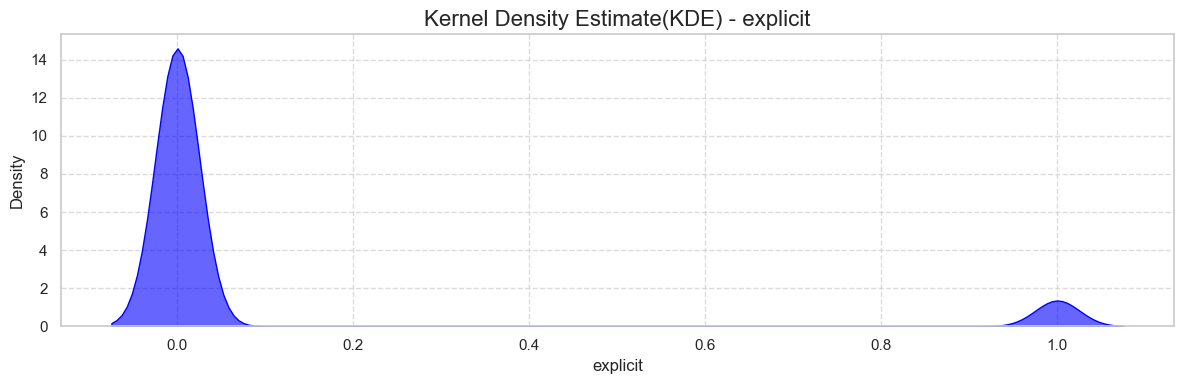

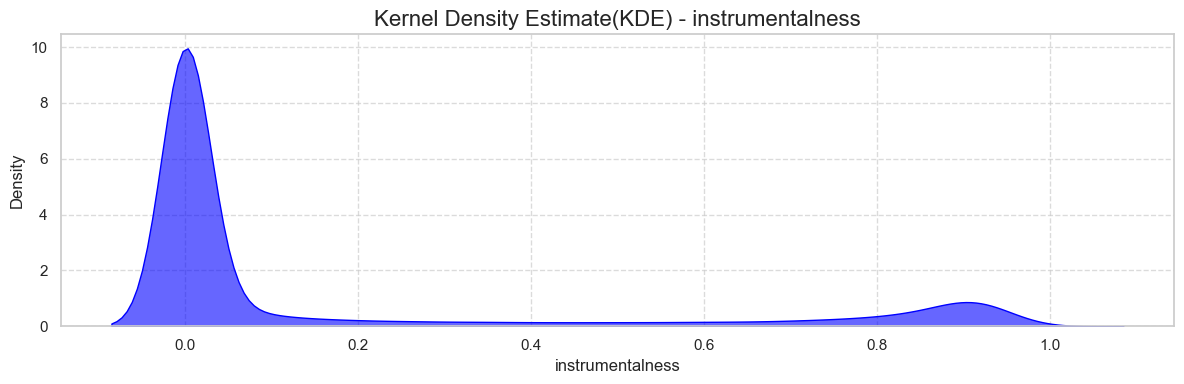

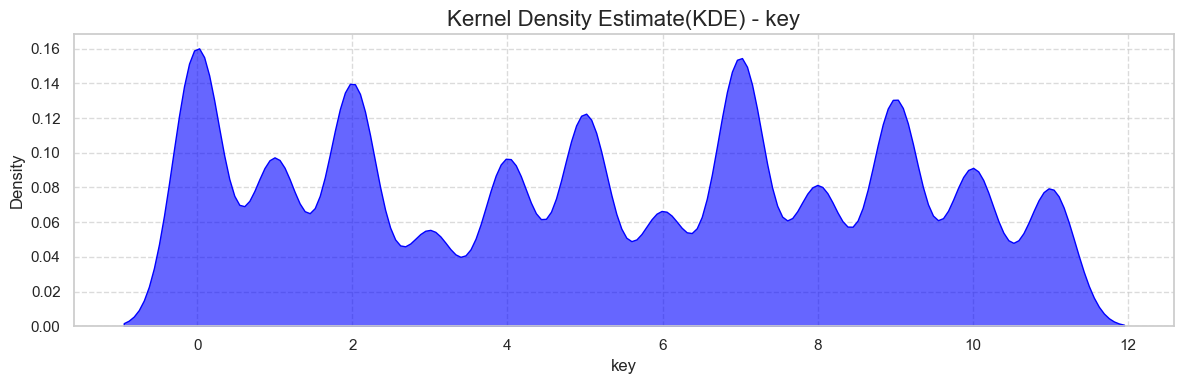

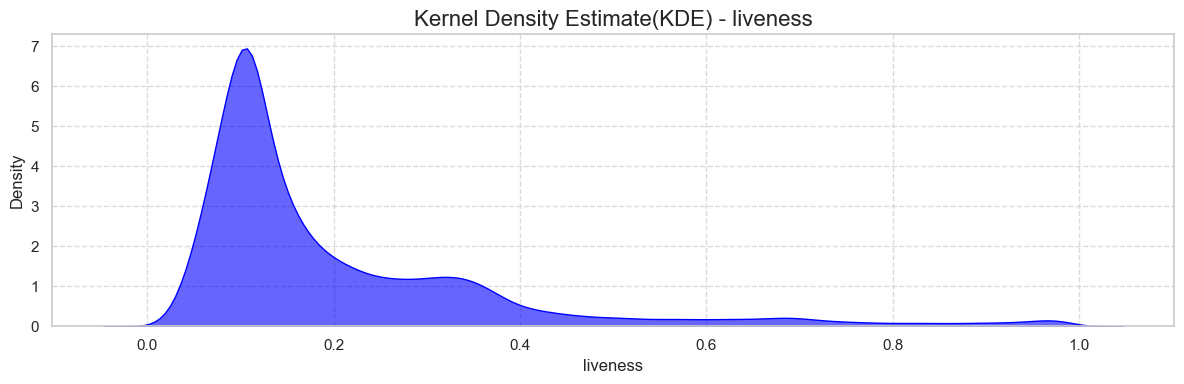

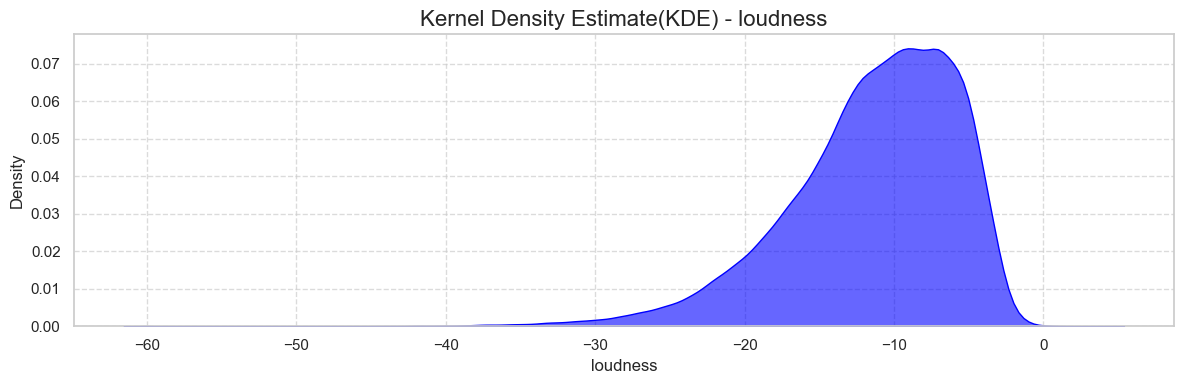

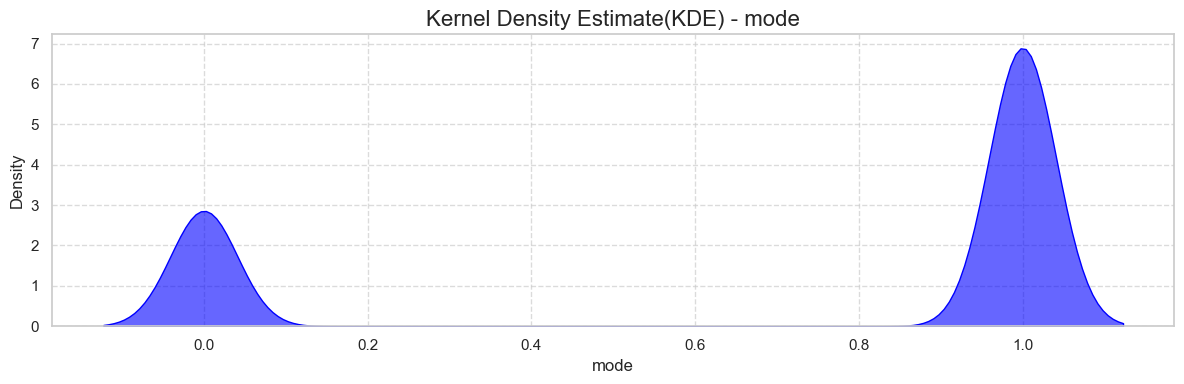

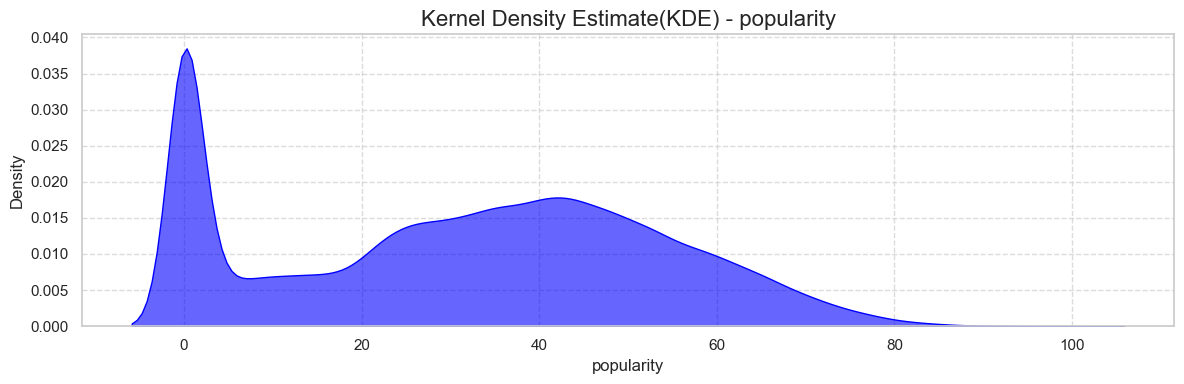

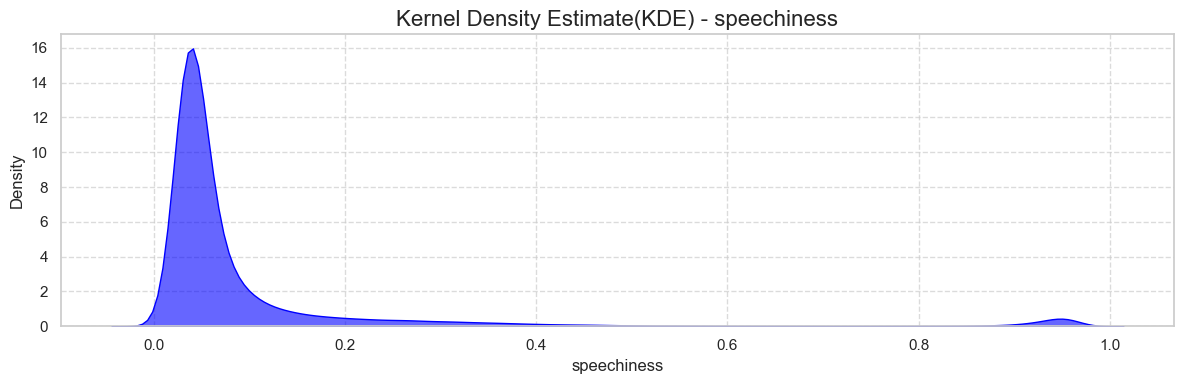

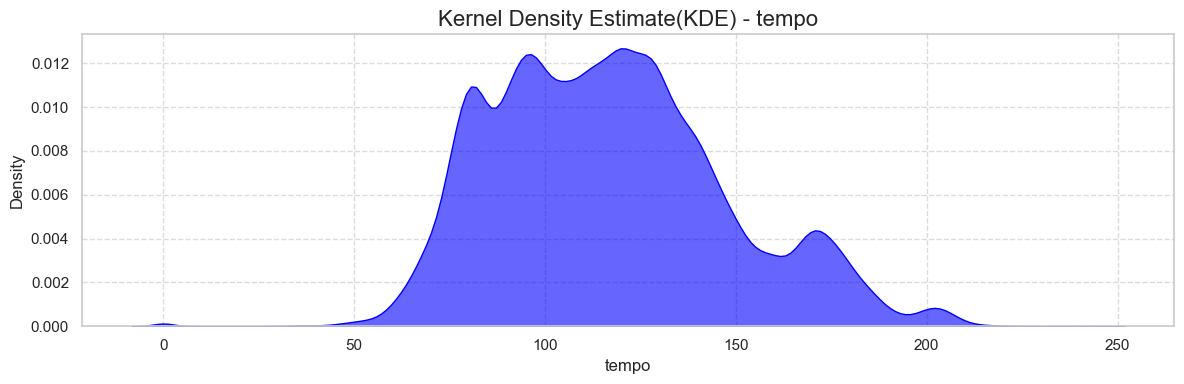

In [ ]:
set(style="whitegrid")
for	col	in df.select_dtypes('number').columns:
    figure(figsize=(12,	4))
    kdeplot(df[col], fill=True,	color='blue', alpha=0.6)
    title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    xlabel(col,	fontsize=12)
    ylabel('Density', fontsize=12)
    grid(True, linestyle='--', alpha=0.7)
    tight_layout()
    show()

-----------------------------

### **Log Transformation**


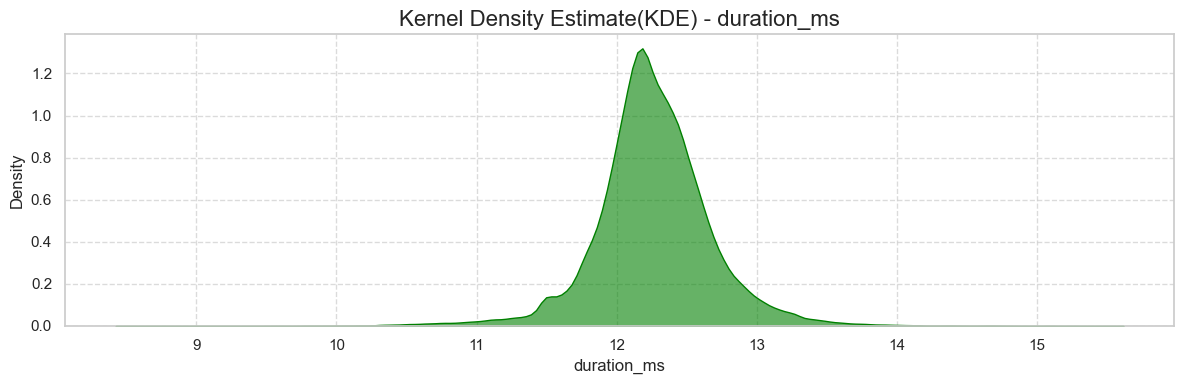

C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


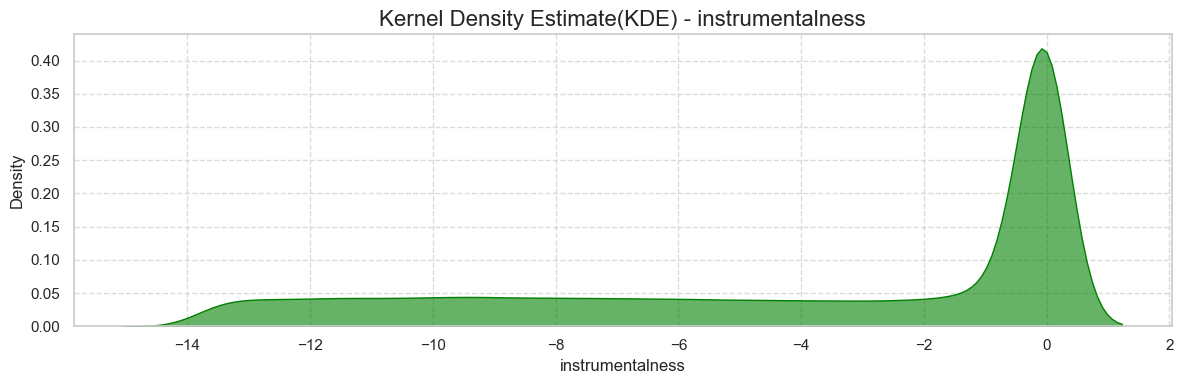

C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


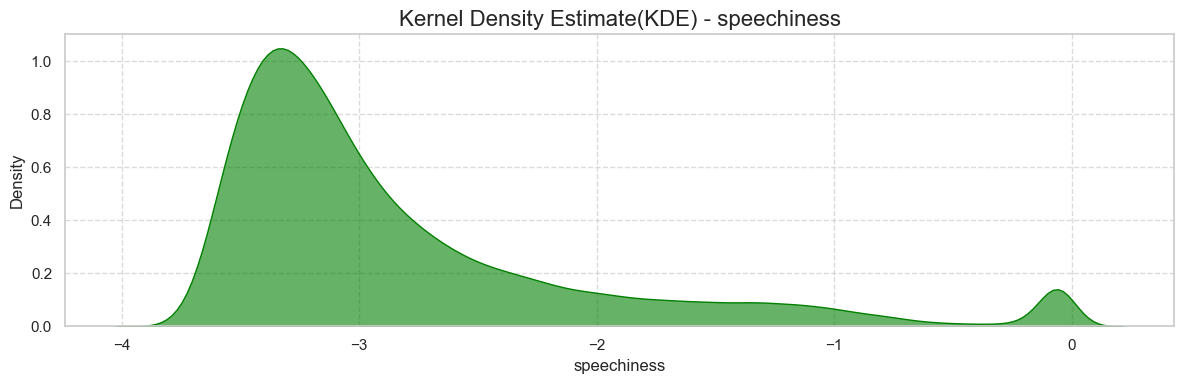

In [ ]:
set(style="whitegrid")
for	col	in df[['duration_ms','instrumentalness','speechiness']]:
    figure(figsize=(12,	4))
    kdeplot(log(df[col]).replace(-inf,1e-6), fill=True, color='green', alpha=0.6)
    title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    xlabel(col,	fontsize=12)
    ylabel('Density', fontsize=12)
    grid(True, linestyle='--', alpha=0.7)
    tight_layout()
    show()

--------------------------

### **Correlation**

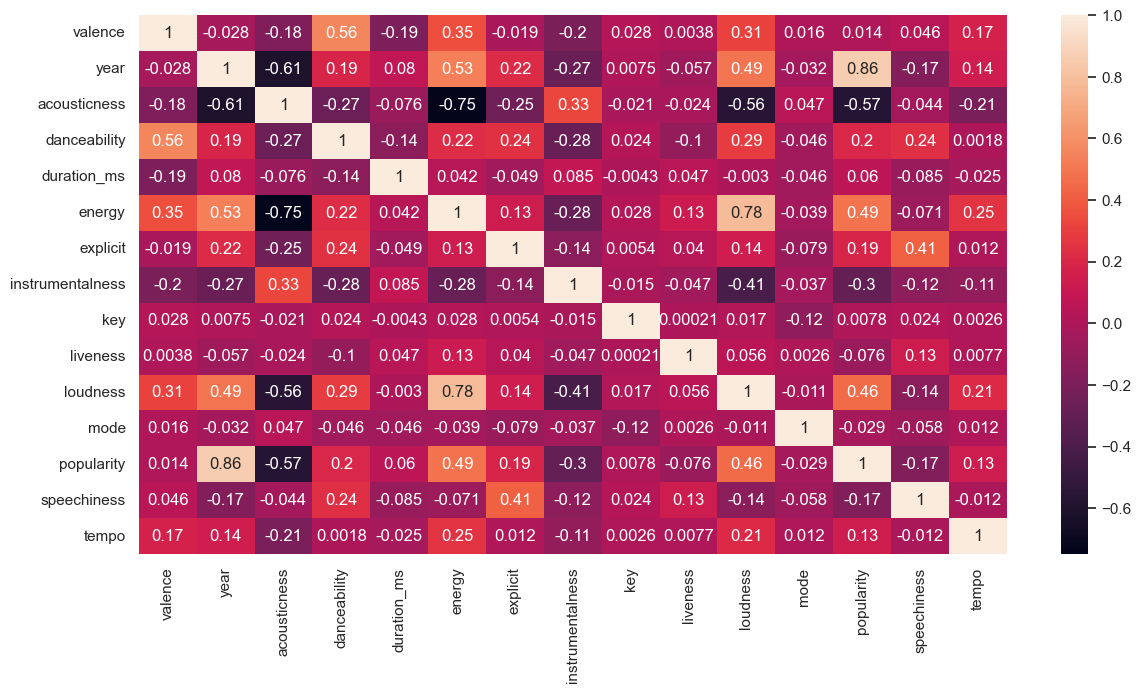

In [ ]:
figure(figsize=(14,	7))
heatmap(df.select_dtypes(include='number').corr(), annot=True)
show()

##### There is a high positive correlation (0.86) between **year** and **popularity**

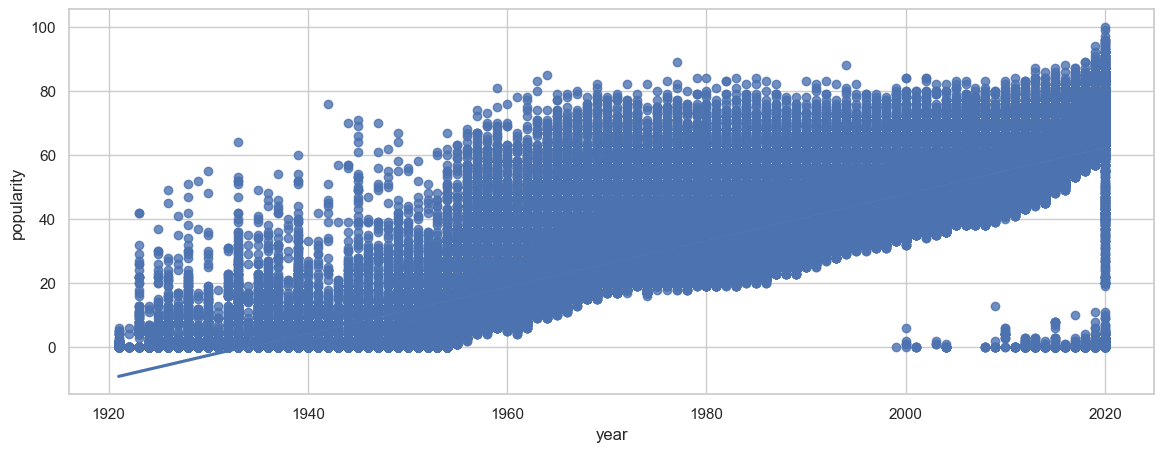

In [ ]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="year", y="popularity", data=df,ax=ax)
show()

-------------------------------------

##### There is a high positive correlation (0.78) between **energy** and **loudness**  

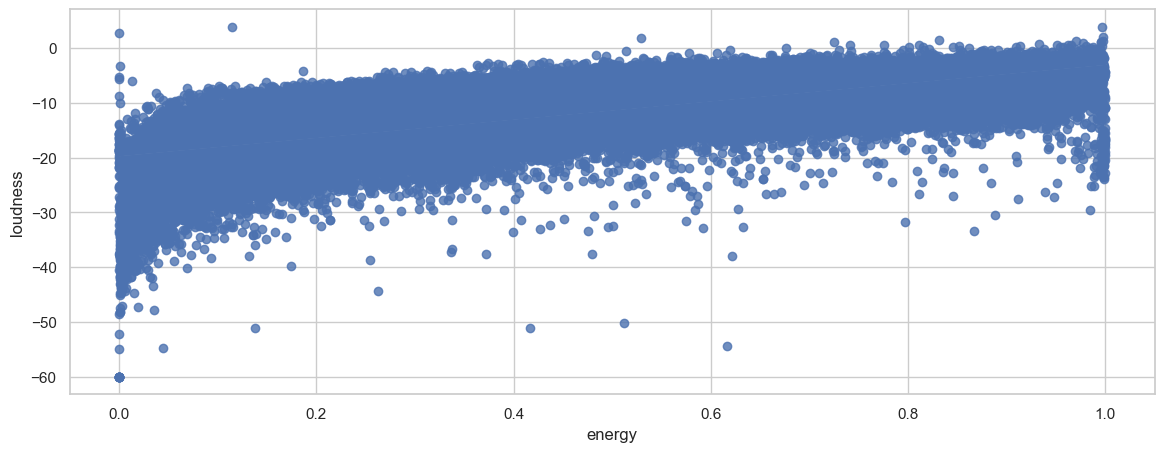

In [ ]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="energy", y="loudness", data=df,ax=ax)
show()

---------------------------------
---------------------------------

## **Detect Outliers**

In [ ]:
df['popularity'].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

<Axes: ylabel='popularity'>

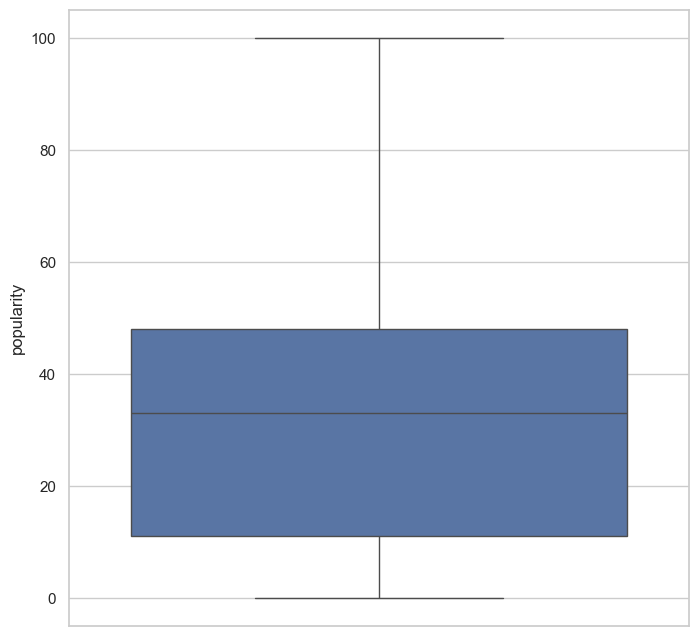

In [ ]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
boxplot(data=df,y="popularity",orient="v",ax=axes)

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


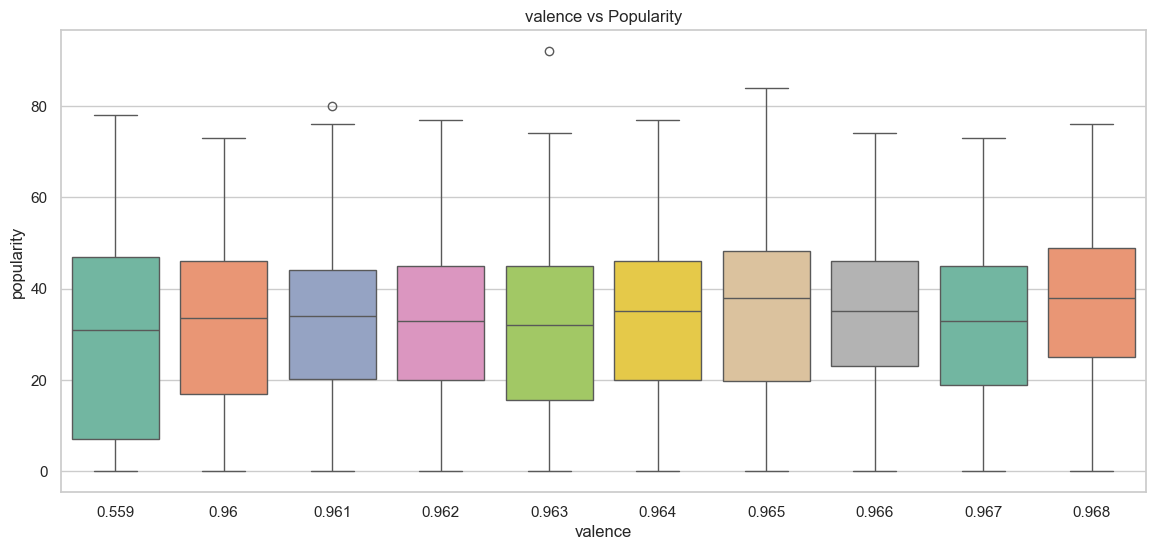

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


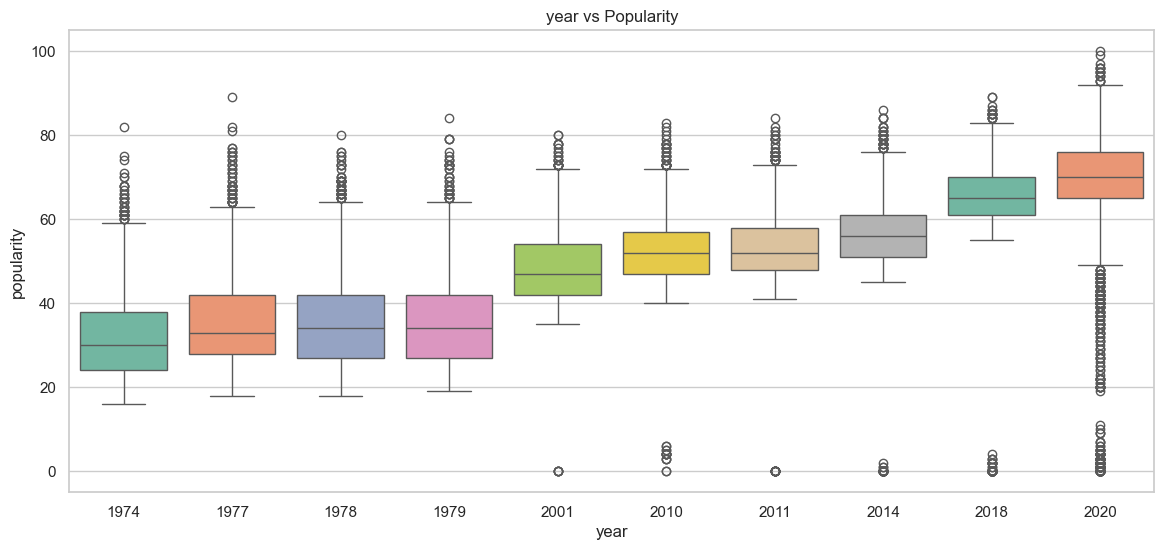

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


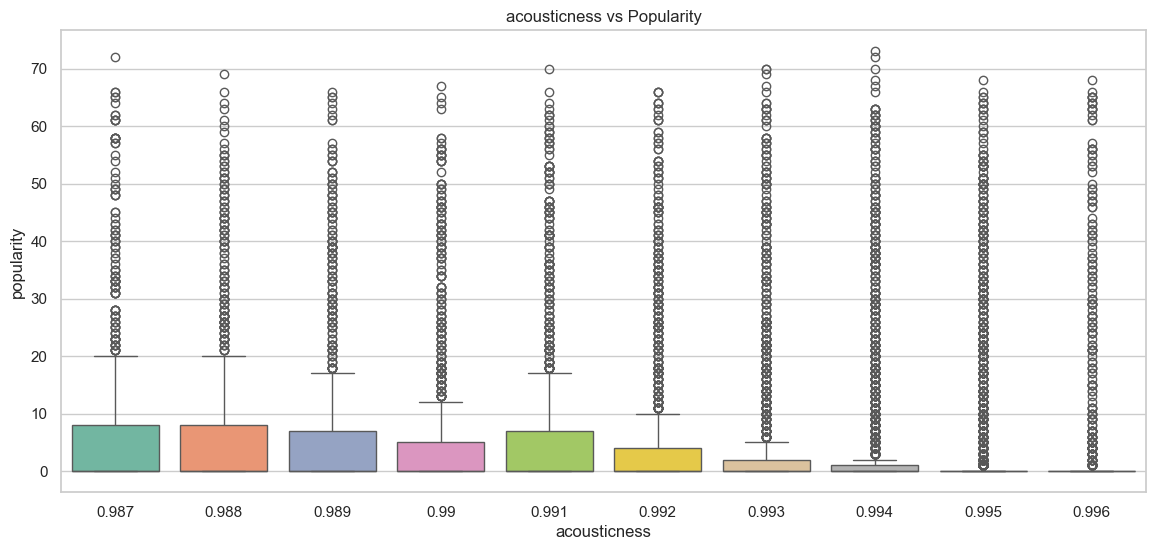

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


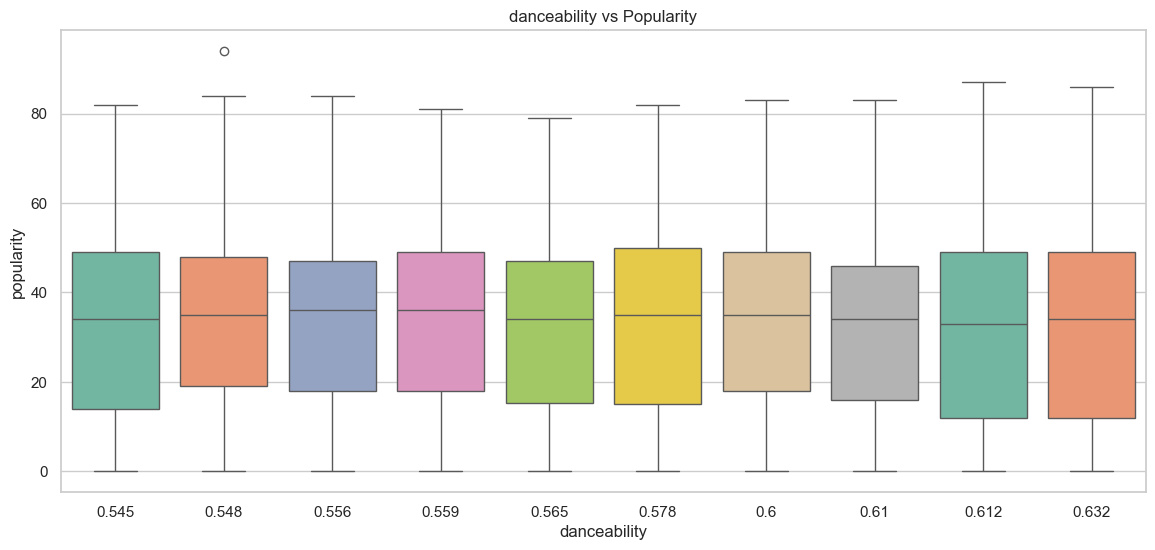

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


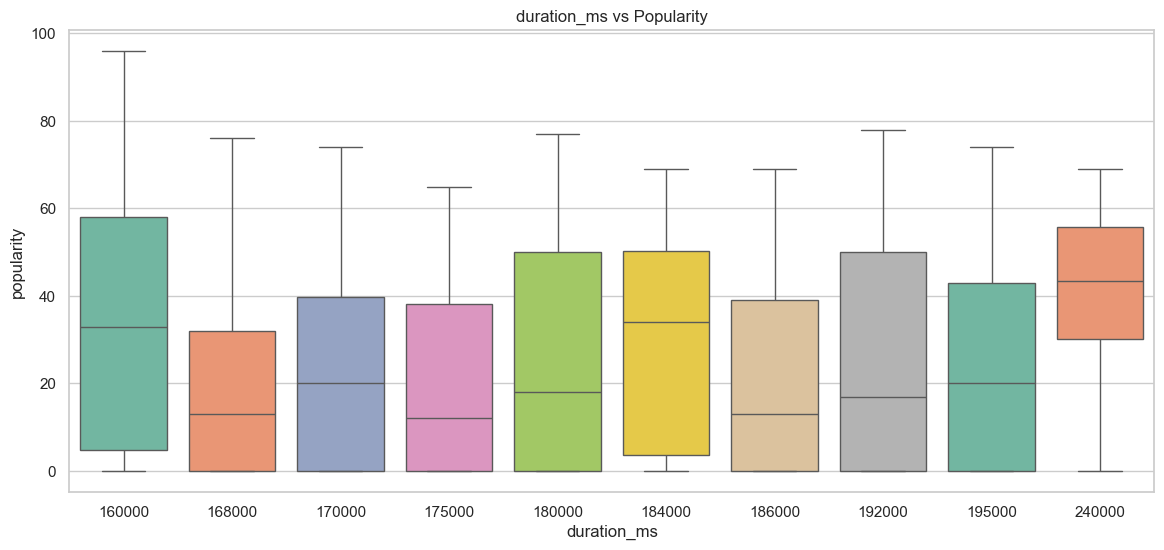

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


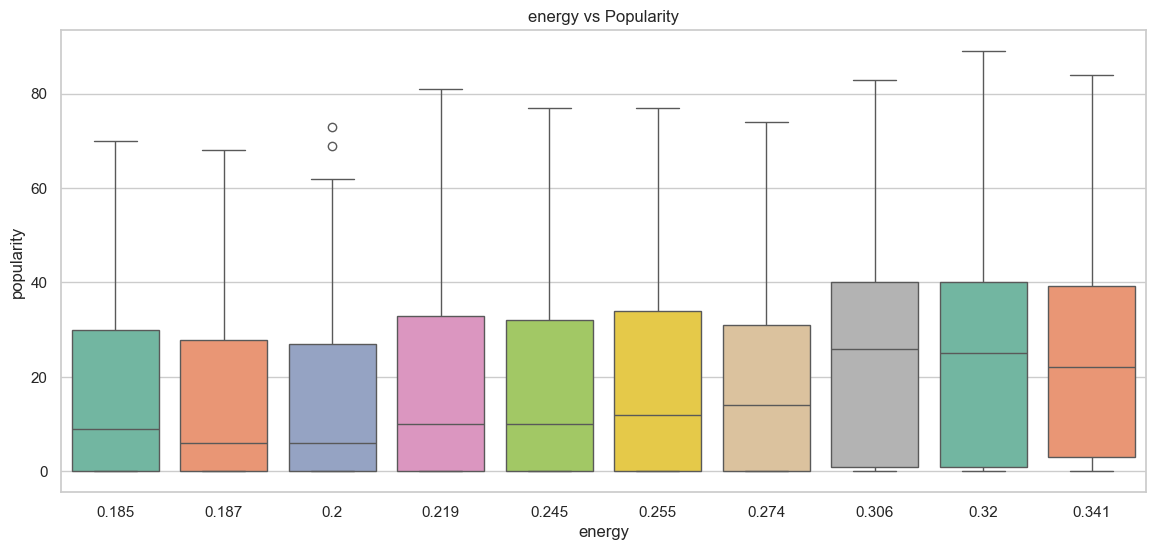

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


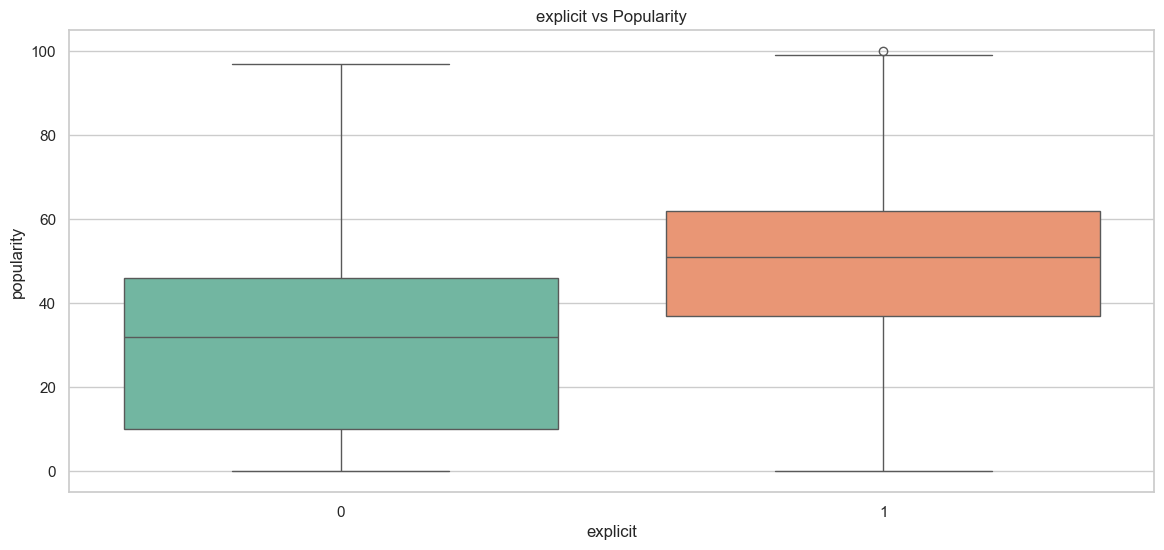

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


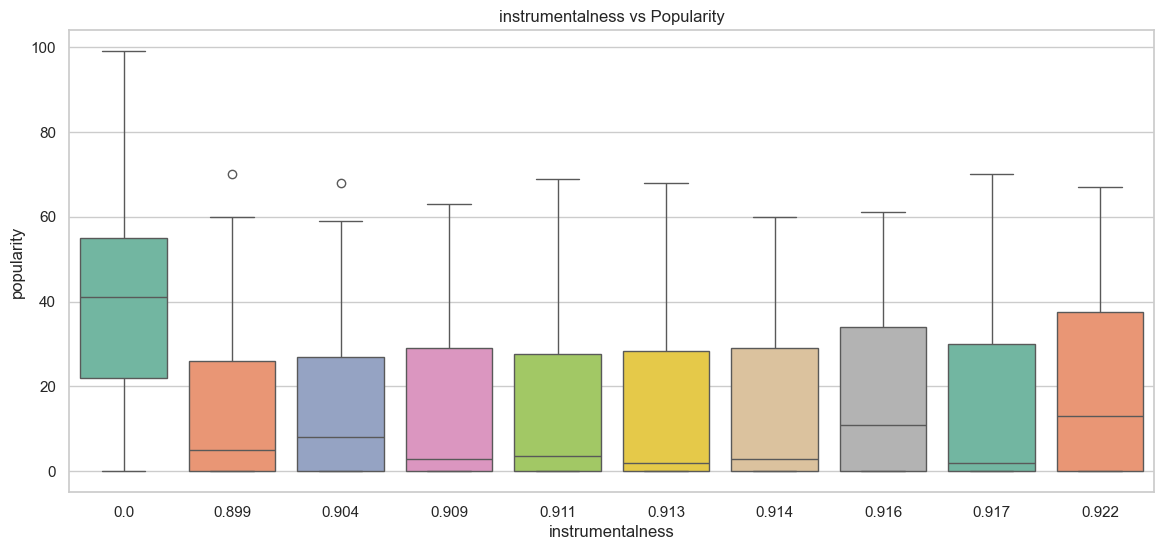

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


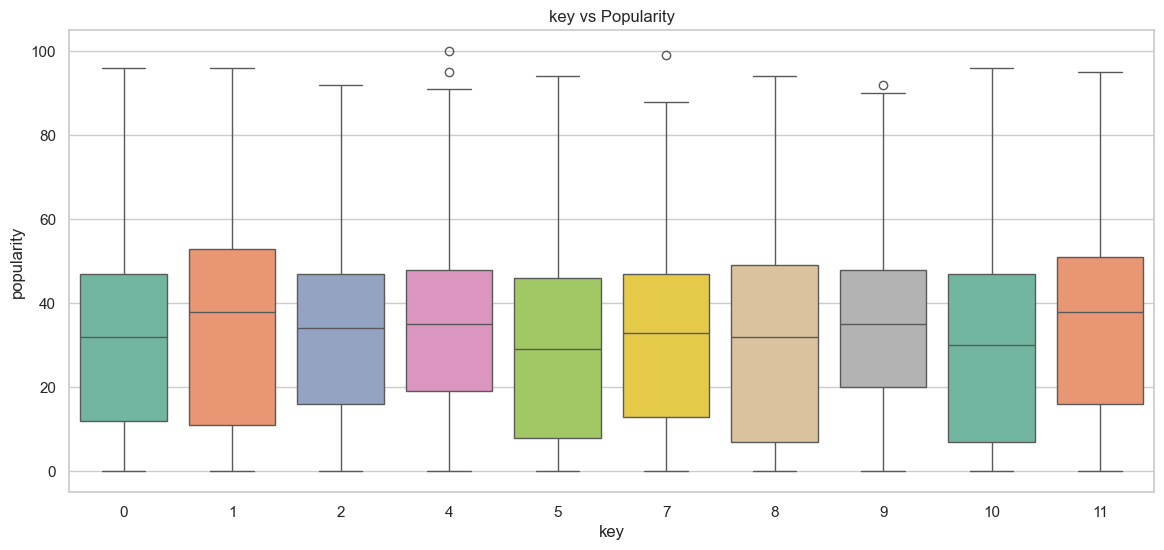

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


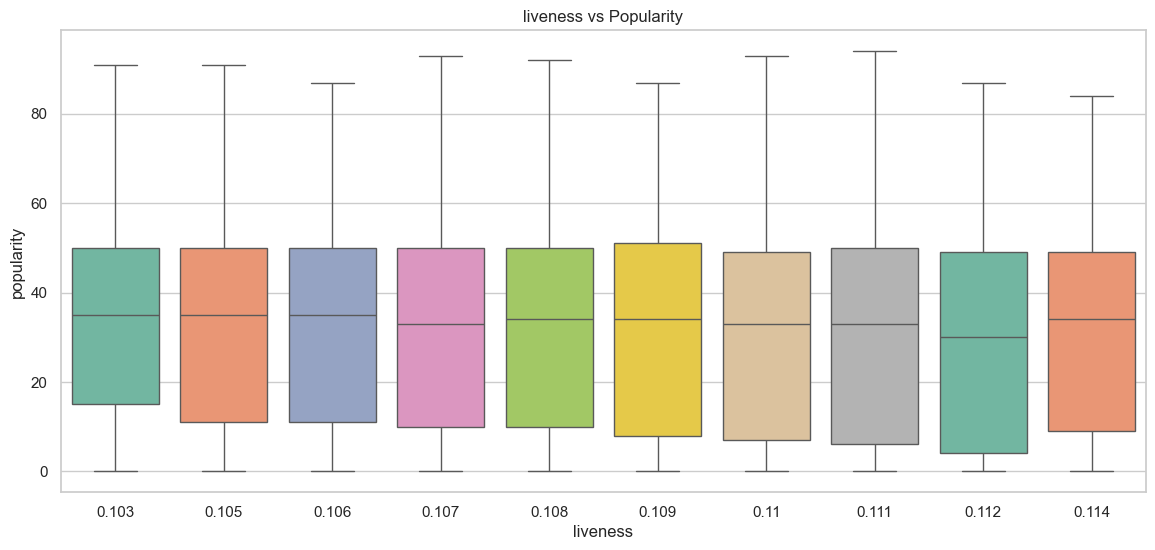

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


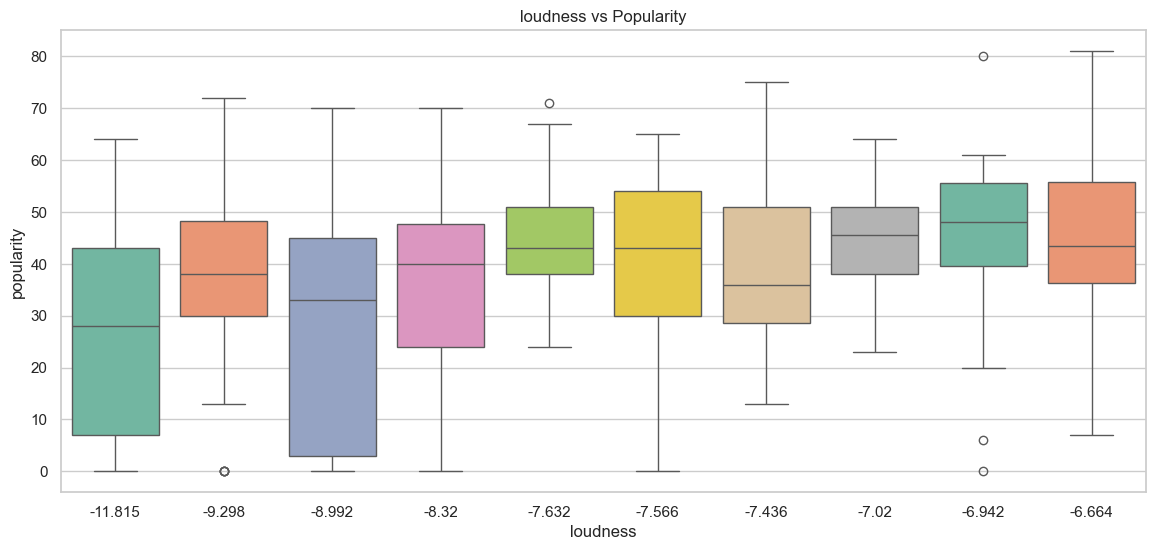

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


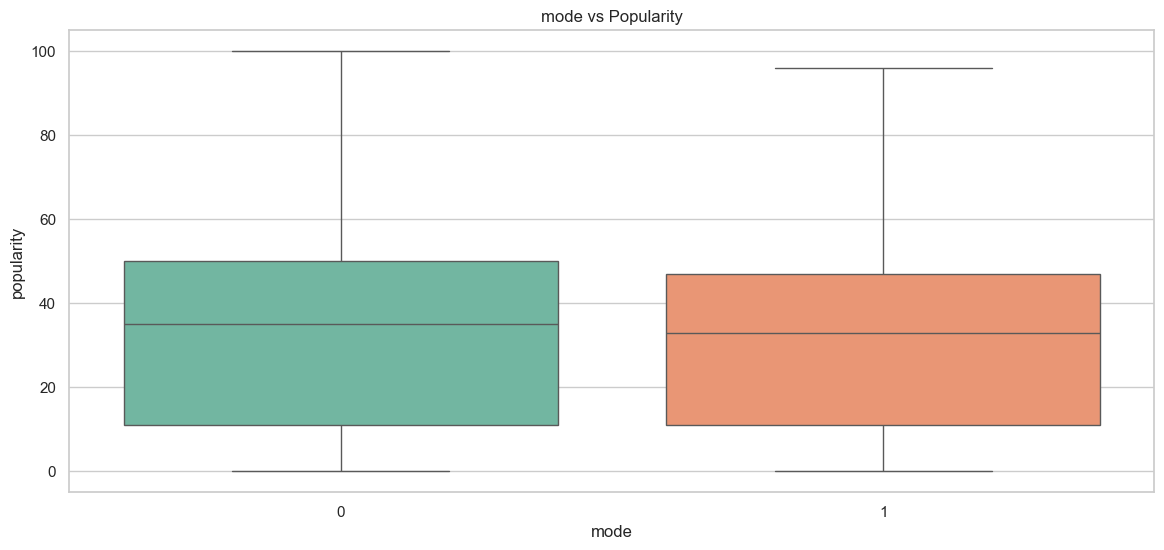

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


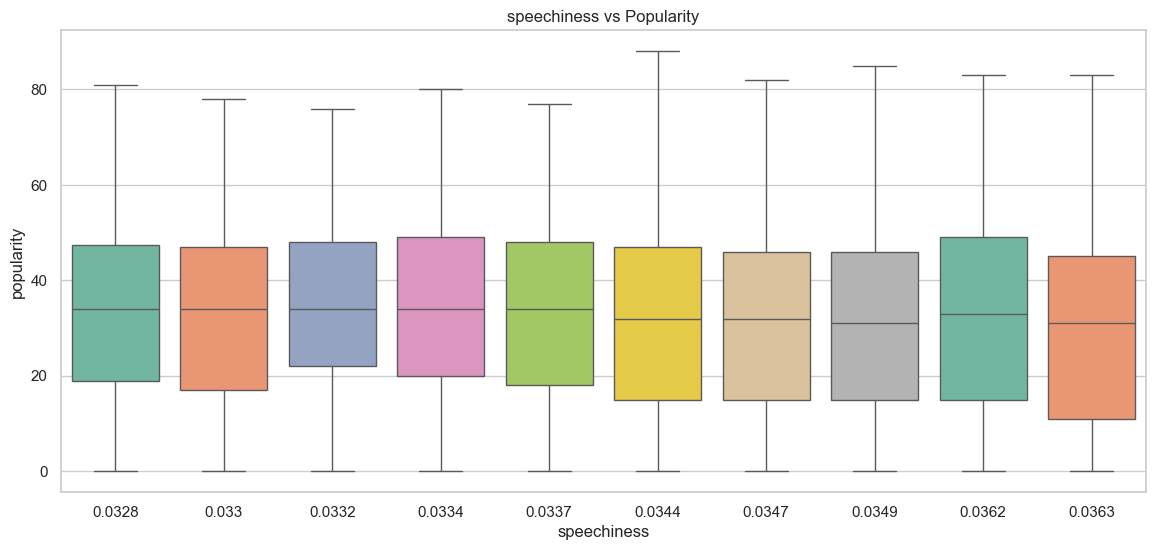

C:\Users\RPC\AppData\Local\Temp\ipykernel_25812\1391813489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")


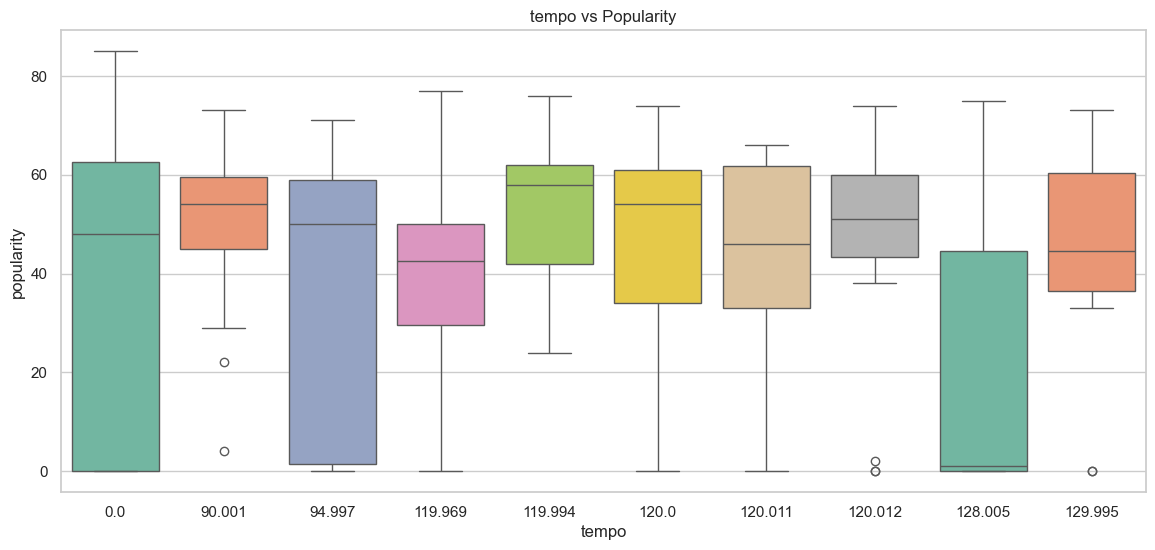

In [ ]:
 #	Target Variable	Analysis
 #	Relationship with Predictors (scatter plots, box Plots against the target)

for col in df.select_dtypes('number').drop('popularity', axis=1):
    top_10_categs = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_10_categs)]

    figure(figsize=(14, 6))

    boxplot(x=filtered_df[col], y=filtered_df['popularity'], palette="Set2")

    title(f'{col} vs Popularity')
    show()

------------------------------------------
------------------------------------------

## **Feature Extraction**

-----------------------------

#### Extracting new column **[duration_min]** from **[duration_ms]**


In [ ]:
df['duration_min'] = df['duration_ms'].apply(lambda x: x / 60000)

In [ ]:
df['duration_min'].head()

0    13.861117
1     3.008883
2     8.334367
3     3.500000
4     2.778217
Name: duration_min, dtype: float64

In [ ]:
df[['duration_ms','duration_min']]

,duration_ms,duration_min
0,831667,13.861117
1,180533,3.008883
2,500062,8.334367
3,210000,3.500000
4,166693,2.778217
...,...,...
170648,301714,5.028567
170649,150654,2.510900
170650,211280,3.521333
170651,337147,5.619117


-------------------------------

##### Extracting new column **[type_of_song_by_valence]** from **[valence]**
- ##### valence < 0.3 ------------> Sad song
- ##### 0.3 =< valence < 0.6 ------------> Balance song between sadness and joy                                                    
- ##### 0.6 =< valence <= 1.0 ------------> Happy song  

In [ ]:
def GetTypeOfValence(valence) :
    valence = float(valence)
    
    if valence < 0.3 :
        return 'Sad song'
    elif valence < 0.6 :
        return 'Balance song between sadness and joy'
    else :
        return 'Happy song'


df['type_of_song_by_valence'] = df['valence'].apply( lambda x : GetTypeOfValence(x))

In [ ]:
df['type_of_song_by_valence'].unique()

array(['Sad song', 'Happy song', 'Balance song between sadness and joy'],
      dtype=object)

In [ ]:
df[['valence','type_of_song_by_valence']]

,valence,type_of_song_by_valence
0,0.0594,Sad song
1,0.9630,Happy song
2,0.0394,Sad song
3,0.1650,Sad song
4,0.2530,Sad song
...,...,...
170648,0.6080,Happy song
170649,0.7340,Happy song
170650,0.6370,Happy song
170651,0.1950,Sad song


In [ ]:
df['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Happy song                              72738
Balance song between sadness and joy    58208
Sad song                                39707
Name: count, dtype: int64

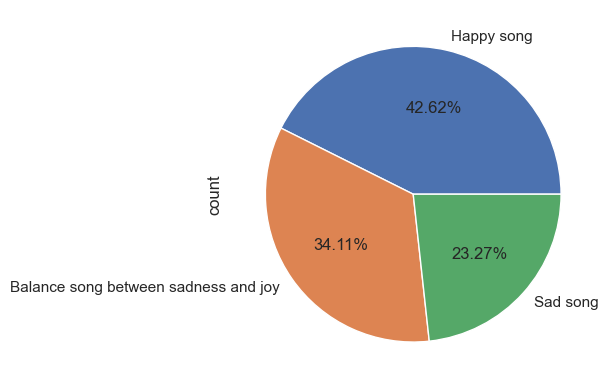

In [ ]:
df['type_of_song_by_valence'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------------------

##### Extracting new column **[type_of_song_by_acousticness]** from **[acousticness]**
- ##### acousticness < 0.3  ------------> Highly electronic song
- ##### 0.3 =< acousticness < 0.6 ------------> Mix of acoustic and electronic instruments                                            
- ##### 0.6 =< acousticness <= 1.0 ------------> Mostly acoustic song

In [ ]:
def GetTypeOfAcousticness(acousticness) :
    acousticness = float(acousticness)
    if acousticness < 0.3 :
        return 'Highly electronic song'
    elif acousticness < 0.6 :
        return 'Mix of acoustic and electronic instruments'
    else :
        return 'Mostly acoustic song'


df['type_of_song_by_acousticness'] = df['acousticness'].apply(lambda x : GetTypeOfAcousticness(x))

In [ ]:
df['type_of_song_by_acousticness'].unique()

array(['Mostly acoustic song',
       'Mix of acoustic and electronic instruments',
       'Highly electronic song'], dtype=object)

In [ ]:
df[['acousticness','type_of_song_by_acousticness']]

,acousticness,type_of_song_by_acousticness
0,0.98200,Mostly acoustic song
1,0.73200,Mostly acoustic song
2,0.96100,Mostly acoustic song
3,0.96700,Mostly acoustic song
4,0.95700,Mostly acoustic song
...,...,...
170648,0.08460,Highly electronic song
170649,0.20600,Highly electronic song
170650,0.10100,Highly electronic song
170651,0.00998,Highly electronic song


In [ ]:
df['type_of_song_by_acousticness'].value_counts()

type_of_song_by_acousticness
Mostly acoustic song                          78239
Highly electronic song                        66554
Mix of acoustic and electronic instruments    25860
Name: count, dtype: int64

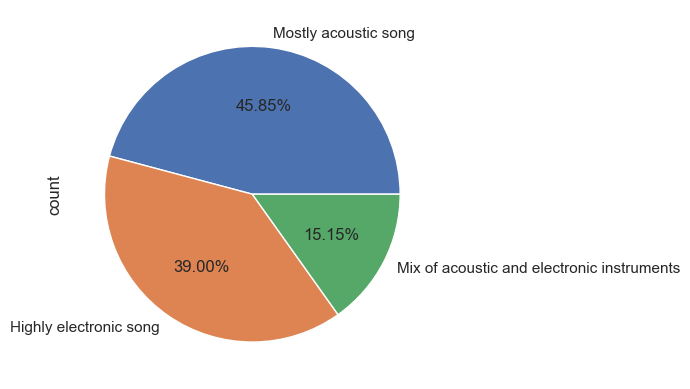

In [ ]:
df['type_of_song_by_acousticness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

---------------------------------

##### Extracting new column **[type_of_song_by_danceability]** from **[danceability]**
- ##### danceability < 0.4 ---------> Not suitable for dance
- ##### 0.4 =< danceability < 0.7 ----------> Medium-paced song                                                                         
- ##### 0.7 =< danceability <= 1.0 ---------> Highly danceable song

In [ ]:
def GetTypeOfDanceability(danceability) :
    danceability = float(danceability)
    if danceability < 0.4 :
        return 'Not suitable for dance'
    elif danceability < 0.7 :
        return 'Medium-paced song'
    else :
        return 'Highly danceable song'

df['type_of_song_by_danceability'] = df['danceability'].apply( lambda x : GetTypeOfDanceability(x))

In [ ]:
df['type_of_song_by_danceability'].unique()

array(['Not suitable for dance', 'Highly danceable song',
       'Medium-paced song'], dtype=object)

In [ ]:
df[['danceability','type_of_song_by_danceability']]

,danceability,type_of_song_by_danceability
0,0.279,Not suitable for dance
1,0.819,Highly danceable song
2,0.328,Not suitable for dance
3,0.275,Not suitable for dance
4,0.418,Medium-paced song
...,...,...
170648,0.786,Highly danceable song
170649,0.717,Highly danceable song
170650,0.634,Medium-paced song
170651,0.671,Medium-paced song


In [ ]:
df['type_of_song_by_danceability'].value_counts()

type_of_song_by_danceability
Medium-paced song         99097
Not suitable for dance    38619
Highly danceable song     32937
Name: count, dtype: int64

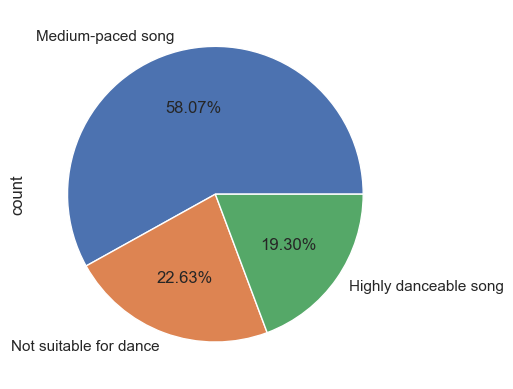

In [ ]:
df['type_of_song_by_danceability'].value_counts().plot.pie(autopct='%0.2f%%')
show()

---------------------------------

##### Extracting new column **[Energy_Level_of_the_Song]** from **[energy]**
- ##### energy < 0.3 ---------> Slow song  
- ##### 0.3 =< energy < 0.6 -----------> Medium-energy song
- ##### 0.6 =< energy <= 1.0 ----------> High-energy song (Enthusiastic)


In [ ]:
def Energy_Level_of_the_Song(energy) :
    energy = float(energy)
    if energy < 0.3 :
        return 'Slow song'
    elif energy < 0.6 :
        return 'Medium-energy song'
    else :
        return 'High-energy song (Enthusiastic)'

df['Energy_Level_of_the_Song'] = df['energy'].apply( lambda x : Energy_Level_of_the_Song(x))

In [ ]:
df['Energy_Level_of_the_Song'].unique()

array(['Slow song', 'Medium-energy song',
       'High-energy song (Enthusiastic)'], dtype=object)

In [ ]:
df[['energy','Energy_Level_of_the_Song']]

,energy,Energy_Level_of_the_Song
0,0.211,Slow song
1,0.341,Medium-energy song
2,0.166,Slow song
3,0.309,Medium-energy song
4,0.193,Slow song
...,...,...
170648,0.808,High-energy song (Enthusiastic)
170649,0.753,High-energy song (Enthusiastic)
170650,0.858,High-energy song (Enthusiastic)
170651,0.623,High-energy song (Enthusiastic)


In [ ]:
df['Energy_Level_of_the_Song'].value_counts()

Energy_Level_of_the_Song
High-energy song (Enthusiastic)    61083
Medium-energy song                 57557
Slow song                          52013
Name: count, dtype: int64

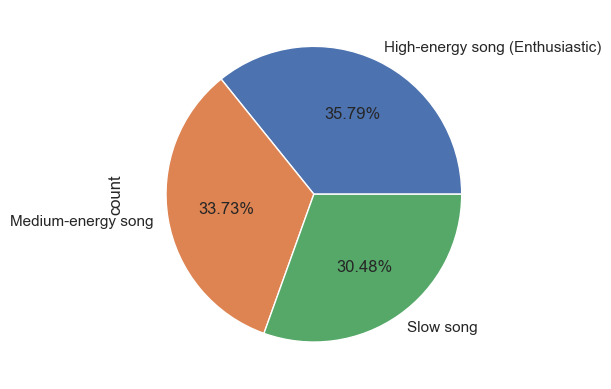

In [ ]:
df['Energy_Level_of_the_Song'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------------

##### Extracting new column **[type_of_song_by_instrumentalness]** from **[instrumentalness]**
- ##### instrumentalness < 0.3 -----------> Song clearly contains lyrics
- ##### 0.3 =< instrumentalness < 0.7 ------------> Song contain some words
- ##### 0.7 =< instrumentalness <= 1.0 ------------> Nearly purely instrumental song

In [ ]:
def type_of_song_by_instrumentalness(instrumentalness) :
    instrumentalness = float(instrumentalness)
    if instrumentalness < 0.3 :
        return 'Song clearly contains lyrics'
    elif instrumentalness < 0.7 :
        return 'Song contain some words'
    else:
        return 'Nearly purely instrumental song'

df['type_of_song_by_instrumentalness'] = df['instrumentalness'].apply( lambda x : type_of_song_by_instrumentalness(x))

In [ ]:
df['type_of_song_by_instrumentalness'].unique()

array(['Nearly purely instrumental song', 'Song clearly contains lyrics',
       'Song contain some words'], dtype=object)

In [ ]:
df[['instrumentalness','type_of_song_by_instrumentalness']]

,instrumentalness,type_of_song_by_instrumentalness
0,0.878000,Nearly purely instrumental song
1,0.000000,Song clearly contains lyrics
2,0.913000,Nearly purely instrumental song
3,0.000028,Song clearly contains lyrics
4,0.000002,Song clearly contains lyrics
...,...,...
170648,0.000289,Song clearly contains lyrics
170649,0.000000,Song clearly contains lyrics
170650,0.000009,Song clearly contains lyrics
170651,0.000008,Song clearly contains lyrics


In [ ]:
df['type_of_song_by_instrumentalness'].value_counts()

type_of_song_by_instrumentalness
Song clearly contains lyrics       135868
Nearly purely instrumental song     24206
Song contain some words             10579
Name: count, dtype: int64

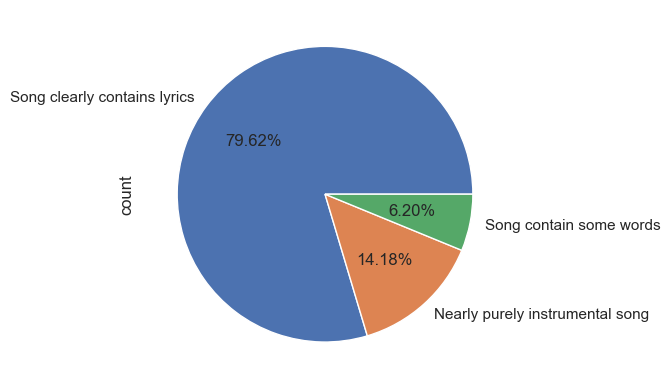

In [ ]:
df['type_of_song_by_instrumentalness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

##### Extracting new column **[type_of_song_by_liveness]** from **[liveness]**
- ##### liveness < 0.3 ----------> Pure studio recordings
- ##### 0.3 =< liveness < 0.7 -----------> Records may have a simple reaction with the audience
- ##### 0.7 =< liveness <= 1.0 -----------> Clearly a live recording with an audience

In [ ]:
def type_of_song_by_liveness(liveness) :
    liveness = float(liveness)
    if liveness < 0.3 :
        return 'Pure studio recordings'
    elif liveness < 0.7 :
        return 'Records may have a simple reaction with the audience'
    else:
        return 'Clearly a live recording with an audience'

df['type_of_song_by_liveness'] = df['liveness'].apply( lambda x : type_of_song_by_liveness(x))

In [ ]:
df['type_of_song_by_liveness'].unique()

array(['Records may have a simple reaction with the audience',
       'Pure studio recordings',
       'Clearly a live recording with an audience'], dtype=object)

In [ ]:
df[['liveness','type_of_song_by_liveness']]

,liveness,type_of_song_by_liveness
0,0.6650,Records may have a simple reaction with the au...
1,0.1600,Pure studio recordings
2,0.1010,Pure studio recordings
3,0.3810,Records may have a simple reaction with the au...
4,0.2290,Pure studio recordings
...,...,...
170648,0.0822,Pure studio recordings
170649,0.1010,Pure studio recordings
170650,0.2580,Pure studio recordings
170651,0.6430,Records may have a simple reaction with the au...


In [ ]:
df['type_of_song_by_liveness'].value_counts()

type_of_song_by_liveness
Pure studio recordings                                  135703
Records may have a simple reaction with the audience     29446
Clearly a live recording with an audience                 5504
Name: count, dtype: int64

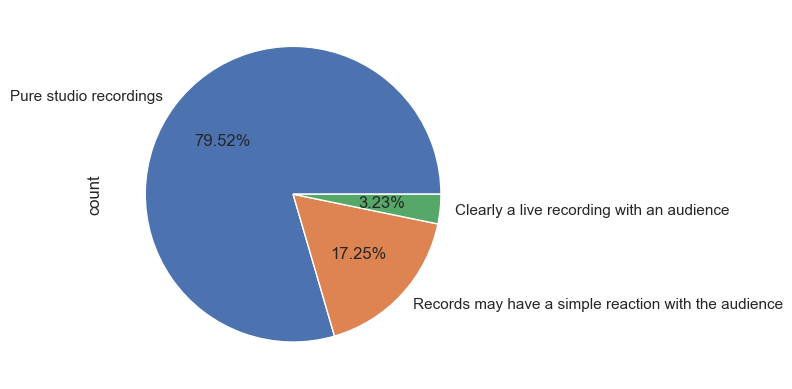

In [ ]:
df['type_of_song_by_liveness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

##### Extracting new column **[type_of_song_by_loudness(dB)]** from **[loudness]**
- ##### -30  >= loudness > -60 ----------> Quieter Sound
- ##### -5 > loudness > -30 ------------> Quiet song                                                        
- ##### loudness >= -5 -----------> Loud song

In [ ]:
def type_of_song_by_loudness(loudness) :
    loudness = float(loudness)
    if loudness <= -30 :
        return 'Quieter Sound'
    elif loudness <= -5 :
        return 'Quiet song'
    else :
        return 'Loud song'

df['type_of_song_by_loudness(dB)'] = df['loudness'].apply(lambda x : type_of_song_by_loudness(x))

In [ ]:
df['type_of_song_by_loudness(dB)'].unique()

array(['Quiet song', 'Quieter Sound', 'Loud song', None], dtype=object)

In [ ]:
df[['loudness','type_of_song_by_loudness(dB)']]

,loudness,type_of_song_by_loudness(dB)
0,-20.096,Quiet song
1,-12.441,Quiet song
2,-14.850,Quiet song
3,-9.316,Quiet song
4,-10.096,Quiet song
...,...,...
170648,-3.702,Loud song
170649,-6.020,Quiet song
170650,-2.226,Loud song
170651,-7.161,Quiet song


In [ ]:
df['type_of_song_by_loudness(dB)'].value_counts()

type_of_song_by_loudness(dB)
Quiet song       152871
Loud song         16475
Quieter Sound      1307
Name: count, dtype: int64

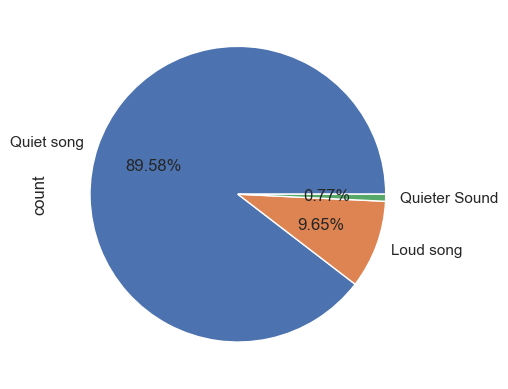

In [ ]:
df['type_of_song_by_loudness(dB)'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

##### Extracting new column **[type_of_song_by_mode]** from **[mode]**
- ##### mode = 0 ---------> Sad tone (Minor)
- ##### mode = 1 ---------> Happy tone (Major)                                                                     

In [ ]:
def typeOfSongByMode(mode) :
    mode = int(mode)
    if mode == 0:
        return 'Sad tone (Minor)'
    else:
        return 'Happy tone (Major)'


df['type_of_song_by_mode'] = df['mode'].apply(lambda x : typeOfSongByMode(x))

In [ ]:
df['type_of_song_by_mode'].unique()

array(['Happy tone (Major)', 'Sad tone (Minor)'], dtype=object)

In [ ]:
df[['mode','type_of_song_by_mode']]

,mode,type_of_song_by_mode
0,1,Happy tone (Major)
1,1,Happy tone (Major)
2,1,Happy tone (Major)
3,1,Happy tone (Major)
4,1,Happy tone (Major)
...,...,...
170648,1,Happy tone (Major)
170649,1,Happy tone (Major)
170650,0,Sad tone (Minor)
170651,1,Happy tone (Major)


In [ ]:
df['type_of_song_by_mode'].value_counts()

type_of_song_by_mode
Happy tone (Major)    120635
Sad tone (Minor)       50018
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\1611046123.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_of_song_by_mode', data=df, palette=['green','red'])


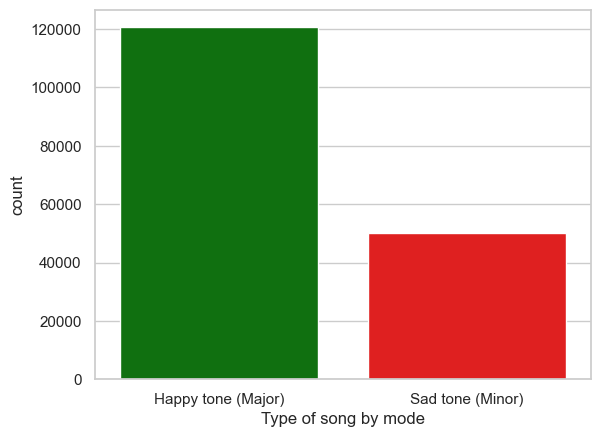

In [ ]:
countplot(x='type_of_song_by_mode', data=df, palette=['green','red'])
xlabel('Type of song by mode')
show()

-----------------

##### Extracting new column **[type_of_song_by_speechiness]** from **[speechiness]**
- ##### speechiness < 0.3 ------------> Mostly instrumental song
- ##### 0.3 =< speechiness < 0.7 ------------> Song with some speech
- ##### 0.7 =< speechiness <= 1.0 -------------> Podcasts or speech-heavy rap   

In [ ]:
def typeOfSongBySpeechiness(speechiness):
    speechiness = float(speechiness)
    if speechiness < 0.3 :
        return 'Mostly instrumental song'
    elif speechiness < 0.7 :
        return 'Song with some speech'
    else:
        return 'Podcasts or speech-heavy rap'

df['type_of_song_by_speechiness'] = df['speechiness'].apply(lambda x : typeOfSongBySpeechiness(x))

In [ ]:
df['type_of_song_by_speechiness'].unique()

array(['Mostly instrumental song', 'Song with some speech',
       'Podcasts or speech-heavy rap'], dtype=object)

In [ ]:
df[['speechiness','type_of_song_by_speechiness']]

,speechiness,type_of_song_by_speechiness
0,0.0366,Mostly instrumental song
1,0.4150,Song with some speech
2,0.0339,Mostly instrumental song
3,0.0354,Mostly instrumental song
4,0.0380,Mostly instrumental song
...,...,...
170648,0.0881,Mostly instrumental song
170649,0.0605,Mostly instrumental song
170650,0.0809,Mostly instrumental song
170651,0.3080,Song with some speech


In [ ]:
df['type_of_song_by_speechiness'].value_counts()

type_of_song_by_speechiness
Mostly instrumental song        159817
Song with some speech             5966
Podcasts or speech-heavy rap      4870
Name: count, dtype: int64

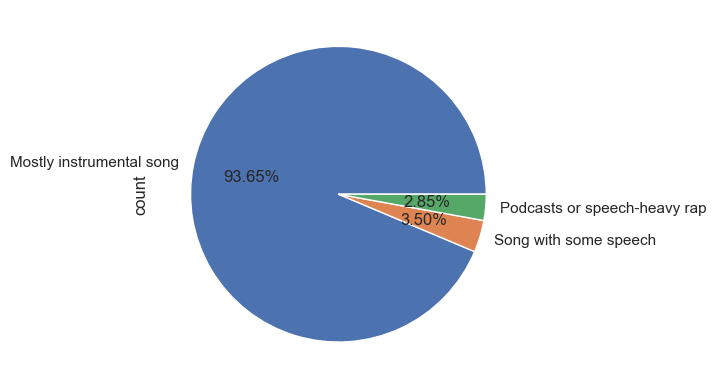

In [ ]:
df['type_of_song_by_speechiness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

##### Extracting new column **[type_of_tempo_in_Beats_Per_Minute(BPM)]** from **[tempo]**
- #####  0 =< tempo < 80 ------------> Slow song
- ##### 80 =< tempo < 120 ------------> Medium-paced song                                                                   
- ##### tempo >= 120 ------------> Fast-paced song

In [ ]:
def typeOftempoInBeatsPerMinute(tempo):
    tempo = float(tempo)
    if tempo < 80.0 :
        return 'Slow song'
    elif tempo < 120.0 :
        return 'Medium-paced song'
    else:
        return 'Fast-paced song'

df['type_of_tempo_in_Beats_Per_Minute(BPM)'] = df['tempo'].apply(lambda x: typeOftempoInBeatsPerMinute(x))

In [ ]:
df['type_of_tempo_in_Beats_Per_Minute(BPM)'].unique()

array(['Medium-paced song', 'Slow song', 'Fast-paced song'], dtype=object)

In [ ]:
df[['tempo','type_of_tempo_in_Beats_Per_Minute(BPM)']]

,tempo,type_of_tempo_in_Beats_Per_Minute(BPM)
0,80.954,Medium-paced song
1,60.936,Slow song
2,110.339,Medium-paced song
3,100.109,Medium-paced song
4,101.665,Medium-paced song
...,...,...
170648,105.029,Medium-paced song
170649,137.936,Fast-paced song
170650,91.688,Medium-paced song
170651,75.055,Slow song


In [ ]:
df['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts()

type_of_tempo_in_Beats_Per_Minute(BPM)
Medium-paced song    78608
Fast-paced song      73959
Slow song            18086
Name: count, dtype: int64

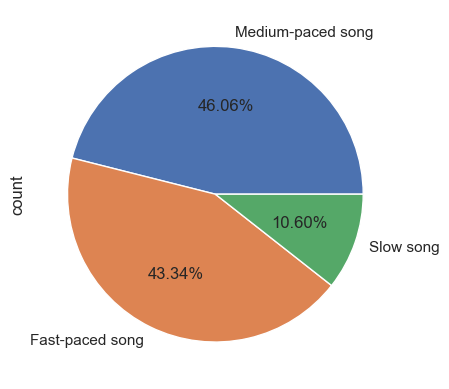

In [ ]:
df['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [ ]:
# for col in df.columns:
#     if df[col].isnull().sum() > 0 :
#         print(f'{col} : {df[col].isnull().sum()}')

--------------------------
--------------------------

In [ ]:
# df.to_csv('Music recommendation system (New data).csv',index=False)

----------------------------
----------------------------

## **Analysis**

In [ ]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,type_of_song_by_valence,type_of_song_by_acousticness,type_of_song_by_danceability,Energy_Level_of_the_Song,type_of_song_by_instrumentalness,type_of_song_by_liveness,type_of_song_by_loudness(dB),type_of_song_by_mode,type_of_song_by_speechiness,type_of_tempo_in_Beats_Per_Minute(BPM)
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,Happy song,Mostly acoustic song,Highly danceable song,Medium-energy song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Song with some speech,Slow song
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,Sad song,Mostly acoustic song,Not suitable for dance,Medium-energy song,Song clearly contains lyrics,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,Sad song,Mostly acoustic song,Medium-paced song,Slow song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,...,Happy song,Highly electronic song,Highly danceable song,High-energy song (Enthusiastic),Song clearly contains lyrics,Pure studio recordings,Loud song,Happy tone (Major),Mostly instrumental song,Medium-paced song
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,Happy song,Highly electronic song,Highly danceable song,High-energy song (Enthusiastic),Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Fast-paced song
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,Happy song,Highly electronic song,Medium-paced song,High-energy song (Enthusiastic),Song clearly contains lyrics,Pure studio recordings,Loud song,Sad tone (Minor),Mostly instrumental song,Medium-paced song
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,Sad song,Highly electronic song,Medium-paced song,High-energy song (Enthusiastic),Song clearly contains lyrics,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Song with some speech,Slow song


In [ ]:
df.shape

(170653, 30)

In [ ]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'duration_min', 'type_of_song_by_valence',
       'type_of_song_by_acousticness', 'type_of_song_by_danceability',
       'Energy_Level_of_the_Song', 'type_of_song_by_instrumentalness',
       'type_of_song_by_liveness', 'type_of_song_by_loudness(dB)',
       'type_of_song_by_mode', 'type_of_song_by_speechiness',
       'type_of_tempo_in_Beats_Per_Minute(BPM)'],
      dtype='object')

- ##### **Years by sum of popularity**

In [ ]:
df['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [ ]:
sortOrder = [1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020]

yearAggregated = DataFrame(df.groupby("year")["popularity"].mean()).reset_index()

missing_years = set(sortOrder) - set(yearAggregated['year'])
valid_sortOrder = [year for year in sortOrder if year in yearAggregated['year'].values]

In [ ]:
df['year'].loc[df.popularity == 0].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1934, 1935, 1937, 1938, 1941, 1942, 1943, 1944, 1946, 2020,
       1933, 1939, 1940, 1945, 1947, 1948, 1936, 1950, 1952, 1949, 1951,
       1953, 2018, 2008, 2010, 1954, 2015, 2001, 2017, 1999, 2000, 2004,
       2012, 2014, 2011, 2009, 2013, 2019, 2016])

In [ ]:
yearAggregated

,year,popularity
0,1921,0.653333
1,1922,0.140845
2,1923,5.389189
3,1924,0.661017
4,1925,2.604317
...,...,...
95,2016,59.647190
96,2017,63.263554
97,2018,63.296243
98,2019,65.256542


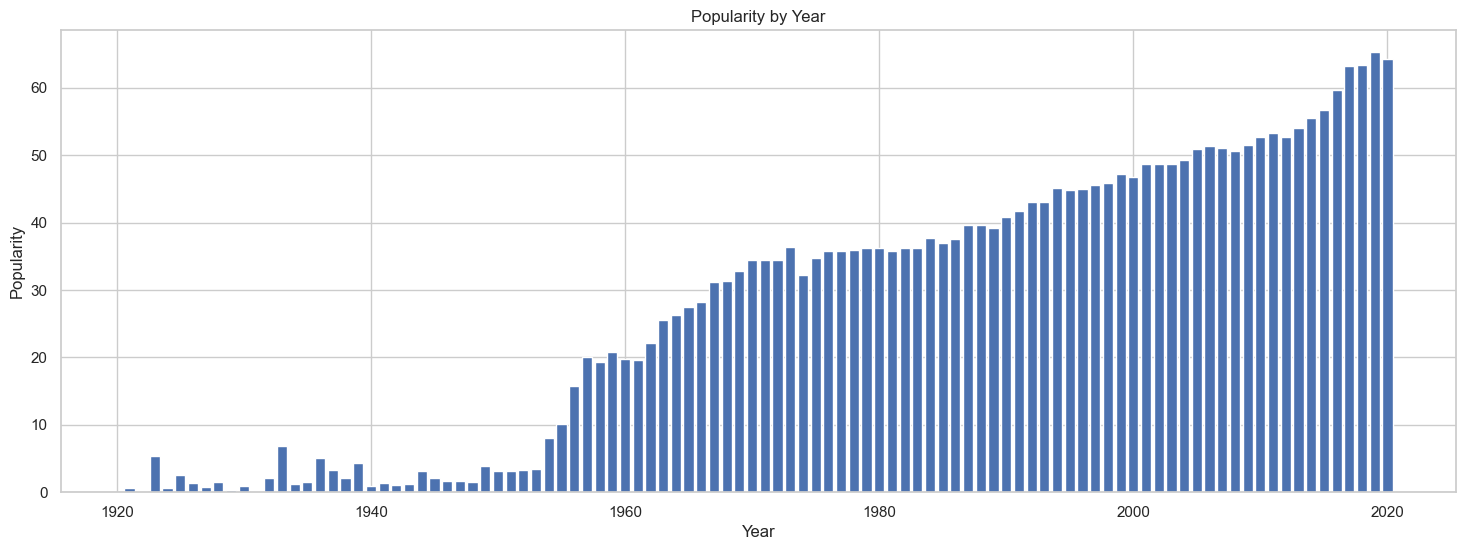

In [ ]:
fig,ax= subplots()
fig.set_size_inches(18,6)
bar(yearAggregated['year'],yearAggregated['popularity'], color = 'b')
title('Popularity by Year')
xlabel('Year')
ylabel('Popularity')
show()

- ##### **Box Plot On popularity Across type of song by valence**

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\3131919778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y="popularity",x="type_of_song_by_valence",orient="v",ax=axes, palette=['r','b','g'])


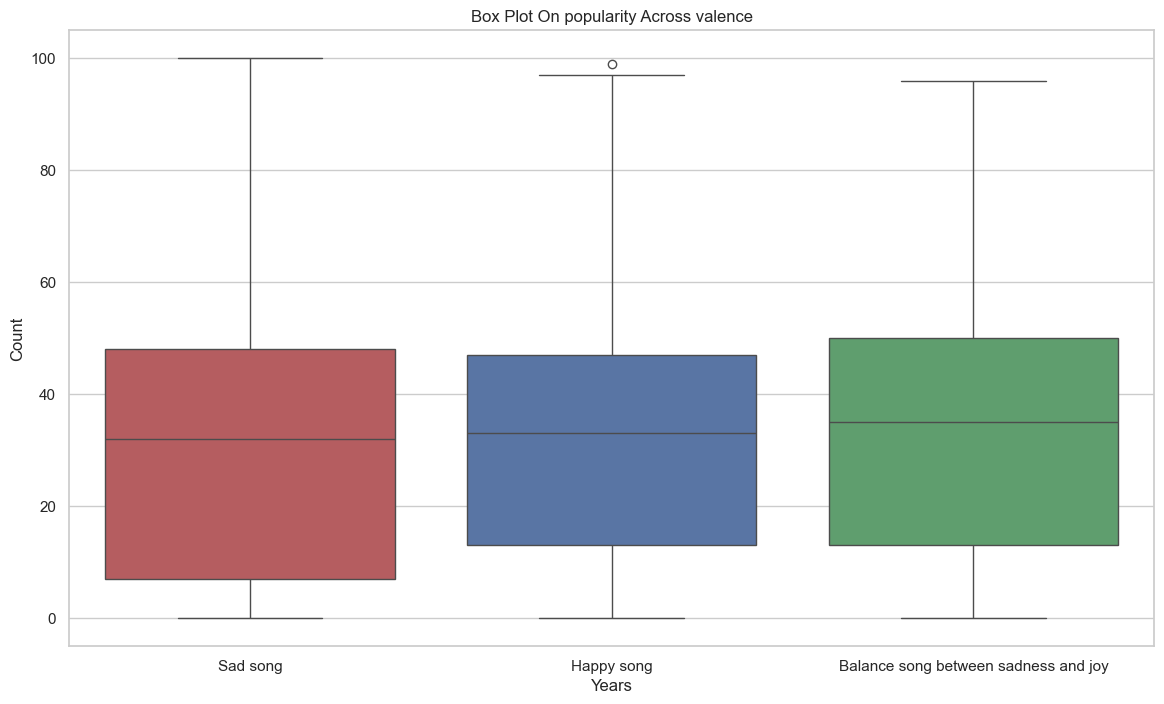

In [ ]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(14, 8)
boxplot(data=df,y="popularity",x="type_of_song_by_valence",orient="v",ax=axes, palette=['r','b','g'])
axes.set(xlabel='Years', ylabel='Count',title="Box Plot On popularity Across valence")
show()

- ##### **Analyze popularity distribution**

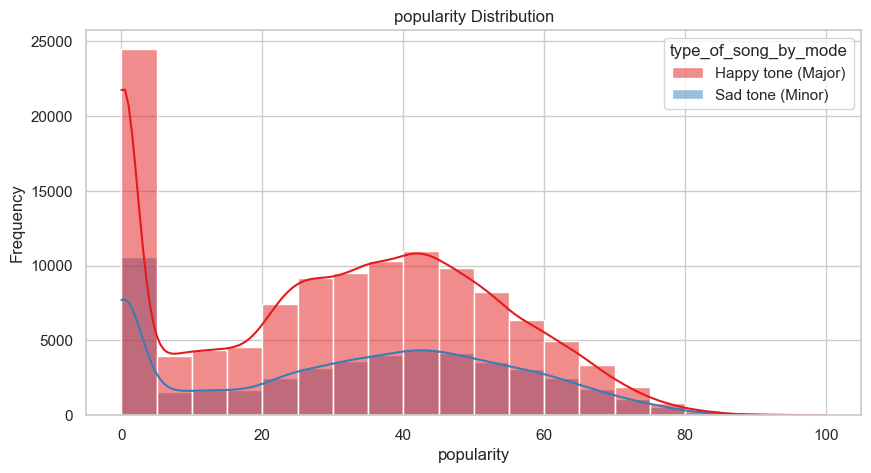

In [ ]:
figure(figsize=(10, 5))
histplot(data=df, x='popularity', hue='type_of_song_by_mode', kde=True, bins=20, palette='Set1')
title('popularity Distribution')
xlabel('popularity')
ylabel('Frequency')
show()

- ##### **Investigate relationships between type_of_song_by_valence and type_of_song_by_danceability**

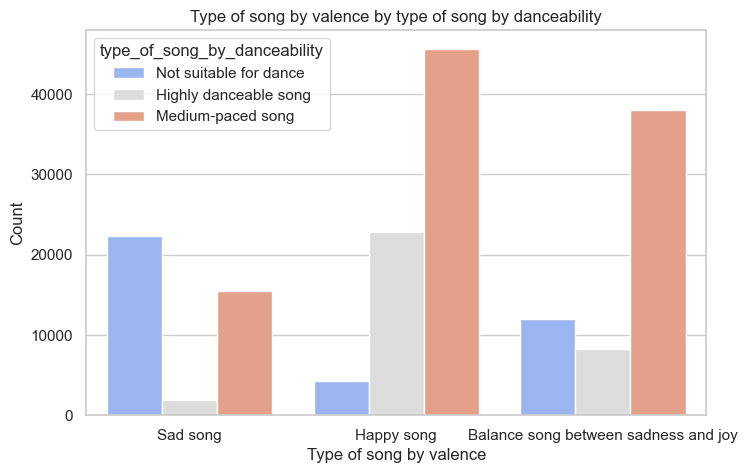

In [ ]:
figure(figsize=(8, 5))
countplot(data=df, x='type_of_song_by_valence', hue='type_of_song_by_danceability', palette='coolwarm')
title('Type of song by valence by type of song by danceability')
xlabel('Type of song by valence')
ylabel('Count')
show()

- ##### **Investigate relationships between Type of song by acousticness and Type of song by instrumentalness**

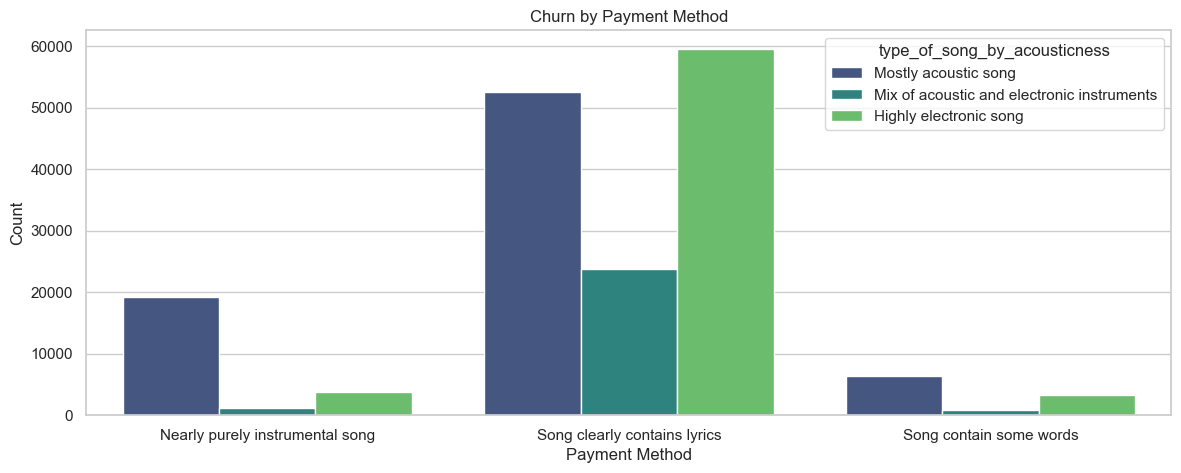

In [ ]:
figure(figsize=(14, 5))
countplot(data=df, x='type_of_song_by_instrumentalness', hue='type_of_song_by_acousticness', palette='viridis')
title('Churn by Payment Method')
xlabel('Payment Method')
# xticks(rotation=45)
ylabel('Count')
show()

- ##### **Songs with popularity >= 95**

In [ ]:
df.loc[(df["popularity"] >= 95) , (["name","artists","year","popularity","type_of_song_by_valence"])]

,name,artists,year,popularity,type_of_song_by_valence
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",2020,99,Happy song
19607,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']",2020,95,Balance song between sadness and joy
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",2020,96,Balance song between sadness and joy
19610,positions,['Ariana Grande'],2020,96,Happy song
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",2020,100,Sad song
19612,What You Know Bout Love,['Pop Smoke'],2020,96,Balance song between sadness and joy
19615,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']",2020,95,Balance song between sadness and joy
19616,Blinding Lights,['The Weeknd'],2020,96,Balance song between sadness and joy
19618,Dynamite,['BTS'],2020,97,Happy song
19620,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']",2020,95,Sad song


- ##### **Songs with popularity >= 80 AND 2020 >= year > 2010**

In [ ]:
df.loc[(df["popularity"] >= 80) & (df['year'] > 2010) & (df['year']<=2020) , (["name","artists","year","popularity","type_of_song_by_valence"])]

,name,artists,year,popularity,type_of_song_by_valence
17806,Tongue Tied,['Grouplove'],2011,82,Balance song between sadness and joy
17807,Pumped Up Kicks,['Foster The People'],2011,84,Happy song
17810,Mistletoe,['Justin Bieber'],2011,81,Happy song
17812,A Thousand Years,['Christina Perri'],2011,81,Sad song
17813,Stereo Hearts (feat. Adam Levine),"['Gym Class Heroes', 'Adam Levine']",2011,80,Happy song
...,...,...,...,...,...
155541,Favorito,['Camilo'],2020,81,Happy song
155554,Let's Love,"['David Guetta', 'Sia']",2020,83,Balance song between sadness and joy
170489,Don't Say Goodbye (feat. Tove Lo),"['Alok', 'Ilkay Sencan', 'Tove Lo']",2020,80,Balance song between sadness and joy
170574,Ayer Me Llamó Mi Ex (feat. Lenny Santos),"['KHEA', 'Lenny Santos']",2020,86,Balance song between sadness and joy


- ##### **Songs with popularity >= 80 AND 2010 >= year > 2000**

In [ ]:
df.loc[(df["popularity"] >= 80) & (df['year'] > 2000) & (df['year']<=2010) , (["name","artists","year","popularity","type_of_song_by_valence"])]

,name,artists,year,popularity,type_of_song_by_valence
15808,Last Resort,['Papa Roach'],2001,80,Happy song
15810,Chop Suey!,['System Of A Down'],2001,80,Sad song
16006,'Till I Collapse,"['Eminem', 'Nate Dogg']",2002,84,Sad song
16008,Without Me,['Eminem'],2002,83,Happy song
16009,The Scientist,['Coldplay'],2002,84,Sad song
16011,Can't Stop,['Red Hot Chili Peppers'],2002,80,Happy song
16013,She Will Be Loved - Radio Mix,['Maroon 5'],2002,80,Balance song between sadness and joy
16206,Numb,['Linkin Park'],2003,82,Sad song
16209,Bring Me To Life,['Evanescence'],2003,80,Sad song
16210,Toxic,['Britney Spears'],2003,80,Happy song


- ##### **Songs with popularity >= 80 AND year < 2000**

In [ ]:
df.loc[(df["popularity"] >= 80) & (df['year'] < 2000) , (["name","artists","year","popularity","type_of_song_by_valence"])]

,name,artists,year,popularity,type_of_song_by_valence
7406,Let It Snow! Let It Snow! Let It Snow!,['Dean Martin'],1959,81,Happy song
8206,It's the Most Wonderful Time of the Year,['Andy Williams'],1963,83,Happy song
8207,Sleigh Ride,['The Ronettes'],1963,80,Happy song
8406,Rockin' Around The Christmas Tree,['Brenda Lee'],1964,85,Happy song
9007,Ain't No Mountain High Enough,"['Marvin Gaye', 'Tammi Terrell']",1967,80,Happy song
9406,Fortunate Son,['Creedence Clearwater Revival'],1969,81,Happy song
9407,Here Comes The Sun - Remastered 2009,['The Beatles'],1969,82,Balance song between sadness and joy
10006,"Rocket Man (I Think It's Going To Be A Long, L...",['Elton John'],1972,82,Balance song between sadness and joy
10406,Sweet Home Alabama,['Lynyrd Skynyrd'],1974,82,Happy song
10606,Landslide,['Fleetwood Mac'],1975,80,Balance song between sadness and joy


- ##### **Songs with popularity >= 80 AND Type of song by danceability = Not suitable for dance**

In [ ]:
df.loc[(df['type_of_song_by_danceability'] == 'Not suitable for dance') & (df['popularity'] >= 80) ,
        (['type_of_song_by_danceability',"type_of_song_by_loudness(dB)",'type_of_tempo_in_Beats_Per_Minute(BPM)','popularity'])]

,type_of_song_by_danceability,type_of_song_by_loudness(dB),type_of_tempo_in_Beats_Per_Minute(BPM),popularity
8206,Not suitable for dance,Quiet song,Fast-paced song,83
11008,Not suitable for dance,Quiet song,Fast-paced song,81
11606,Not suitable for dance,Quiet song,Fast-paced song,84
13813,Not suitable for dance,Quiet song,Slow song,80
14406,Not suitable for dance,Quiet song,Fast-paced song,88
14410,Not suitable for dance,Quiet song,Fast-paced song,81
16209,Not suitable for dance,Loud song,Medium-paced song,80
16421,Not suitable for dance,Quiet song,Fast-paced song,80
16616,Not suitable for dance,Quiet song,Fast-paced song,82
18007,Not suitable for dance,Quiet song,Medium-paced song,83


------------------------------
-----------------------------

## **Feature Selection**

In [ ]:
df = df.drop(['id','artists','name','duration_ms','release_date'], axis=1)

In [ ]:
df = df.dropna()

------------------------------------
------------------------------------

## **Transform data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170644 entries, 0 to 170652
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   valence                                 170644 non-null  float64
 1   year                                    170644 non-null  int64  
 2   acousticness                            170644 non-null  float64
 3   danceability                            170644 non-null  float64
 4   energy                                  170644 non-null  float64
 5   explicit                                170644 non-null  int64  
 6   instrumentalness                        170644 non-null  float64
 7   key                                     170644 non-null  int64  
 8   liveness                                170644 non-null  float64
 9   loudness                                170644 non-null  float64
 10  mode                                    170644 no

In [ ]:
df_object = df.select_dtypes('object')
df_non_object = df.select_dtypes('number')

In [ ]:
df_object.head()

,type_of_song_by_valence,type_of_song_by_acousticness,type_of_song_by_danceability,Energy_Level_of_the_Song,type_of_song_by_instrumentalness,type_of_song_by_liveness,type_of_song_by_loudness(dB),type_of_song_by_mode,type_of_song_by_speechiness,type_of_tempo_in_Beats_Per_Minute(BPM)
0,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
1,Happy song,Mostly acoustic song,Highly danceable song,Medium-energy song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Song with some speech,Slow song
2,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
3,Sad song,Mostly acoustic song,Not suitable for dance,Medium-energy song,Song clearly contains lyrics,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
4,Sad song,Mostly acoustic song,Medium-paced song,Slow song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song


---------------------------------

In [ ]:
df_object['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Happy song                              72738
Balance song between sadness and joy    58208
Sad song                                39698
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Happy song',1)
df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Balance song between sadness and joy',2)
df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Sad song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\2663531264.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Sad song',3)


In [ ]:
df_object['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
1    72738
2    58208
3    39698
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['type_of_song_by_acousticness'].value_counts()

type_of_song_by_acousticness
Mostly acoustic song                          78239
Highly electronic song                        66545
Mix of acoustic and electronic instruments    25860
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Mostly acoustic song',1)
df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Mix of acoustic and electronic instruments',2)
df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Highly electronic song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\3767684794.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Highly electronic song',3)


In [ ]:
df_object['type_of_song_by_acousticness'].value_counts()

type_of_song_by_acousticness
1    78239
3    66545
2    25860
Name: count, dtype: int64

-------------------------------------

In [ ]:
df_object['type_of_song_by_danceability'].value_counts()

type_of_song_by_danceability
Medium-paced song         99097
Not suitable for dance    38610
Highly danceable song     32937
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Not suitable for dance',1)
df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Medium-paced song',2)
df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Highly danceable song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\3406697730.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Highly danceable song',3)


In [ ]:
df_object['type_of_song_by_danceability'].value_counts()

type_of_song_by_danceability
2    99097
1    38610
3    32937
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['Energy_Level_of_the_Song'].value_counts()

Energy_Level_of_the_Song
High-energy song (Enthusiastic)    61083
Medium-energy song                 57557
Slow song                          52004
Name: count, dtype: int64

In [ ]:
df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('High-energy song (Enthusiastic)',3)
df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('Medium-energy song',2)
df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('Slow song',1)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\1294247965.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('Slow song',1)


In [ ]:
df_object['Energy_Level_of_the_Song'].value_counts()

Energy_Level_of_the_Song
3    61083
2    57557
1    52004
Name: count, dtype: int64

---------------------------------

In [ ]:
df_object['type_of_song_by_instrumentalness'].value_counts()

type_of_song_by_instrumentalness
Song clearly contains lyrics       135859
Nearly purely instrumental song     24206
Song contain some words             10579
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Song clearly contains lyrics',1)
df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Song contain some words',2)
df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Nearly purely instrumental song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\1528425387.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Nearly purely instrumental song',3)


In [ ]:
df_object['type_of_song_by_instrumentalness'].value_counts()

type_of_song_by_instrumentalness
1    135859
3     24206
2     10579
Name: count, dtype: int64

--------------------------------

In [ ]:
df_object['type_of_song_by_liveness'].value_counts()

type_of_song_by_liveness
Pure studio recordings                                  135694
Records may have a simple reaction with the audience     29446
Clearly a live recording with an audience                 5504
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Pure studio recordings',1)
df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Records may have a simple reaction with the audience',2)
df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Clearly a live recording with an audience',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\459046852.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Clearly a live recording with an audience',3)


In [ ]:
df_object['type_of_song_by_liveness'].value_counts()

type_of_song_by_liveness
1    135694
2     29446
3      5504
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['type_of_song_by_loudness(dB)'].value_counts()

type_of_song_by_loudness(dB)
Quiet song       152871
Loud song         16475
Quieter Sound      1298
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Quieter Sound',1)
df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Quiet song',2)
df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Loud song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\1004463371.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Loud song',3)


In [ ]:
df_object['type_of_song_by_loudness(dB)'].value_counts()

type_of_song_by_loudness(dB)
2    152871
3     16475
1      1298
Name: count, dtype: int64

-----------------------

In [ ]:
df_object['type_of_song_by_mode'].value_counts()

type_of_song_by_mode
Happy tone (Major)    120635
Sad tone (Minor)       50009
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_mode']= df_object['type_of_song_by_mode'].replace('Happy tone (Major)',1)
df_object['type_of_song_by_mode']= df_object['type_of_song_by_mode'].replace('Sad tone (Minor)',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\3961285733.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_mode']= df_object['type_of_song_by_mode'].replace('Sad tone (Minor)',2)


In [ ]:
df_object['type_of_song_by_mode'].value_counts()

type_of_song_by_mode
1    120635
2     50009
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['type_of_song_by_speechiness'].value_counts()

type_of_song_by_speechiness
Mostly instrumental song        159808
Song with some speech             5966
Podcasts or speech-heavy rap      4870
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Mostly instrumental song',1)
df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Song with some speech',2)
df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Podcasts or speech-heavy rap',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\3992703631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Podcasts or speech-heavy rap',3)


In [ ]:
df_object['type_of_song_by_speechiness'].value_counts()

type_of_song_by_speechiness
1    159808
2      5966
3      4870
Name: count, dtype: int64

-----------------------------------

In [ ]:
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts()

type_of_tempo_in_Beats_Per_Minute(BPM)
Medium-paced song    78608
Fast-paced song      73959
Slow song            18077
Name: count, dtype: int64

In [ ]:
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Slow song',1)
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Medium-paced song',2)
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Fast-paced song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_5000\3481577193.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Fast-paced song',3)


In [ ]:
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts()

type_of_tempo_in_Beats_Per_Minute(BPM)
2    78608
3    73959
1    18077
Name: count, dtype: int64

-----------------------------

In [ ]:
data = concat([df_non_object,df_object], axis=1)

In [ ]:
data.head()

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,...,type_of_song_by_valence,type_of_song_by_acousticness,type_of_song_by_danceability,Energy_Level_of_the_Song,type_of_song_by_instrumentalness,type_of_song_by_liveness,type_of_song_by_loudness(dB),type_of_song_by_mode,type_of_song_by_speechiness,type_of_tempo_in_Beats_Per_Minute(BPM)
0,0.0594,1921,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,...,3,1,1,1,3,2,2,1,1,2
1,0.9630,1921,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,...,1,1,3,2,1,1,2,1,2,1
2,0.0394,1921,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,...,3,1,1,1,3,1,2,1,1,2
3,0.1650,1921,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,...,3,1,1,2,1,2,2,1,1,2
4,0.2530,1921,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,...,3,1,2,1,1,1,2,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170644 entries, 0 to 170652
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   valence                                 170644 non-null  float64
 1   year                                    170644 non-null  int64  
 2   acousticness                            170644 non-null  float64
 3   danceability                            170644 non-null  float64
 4   energy                                  170644 non-null  float64
 5   explicit                                170644 non-null  int64  
 6   instrumentalness                        170644 non-null  float64
 7   key                                     170644 non-null  int64  
 8   liveness                                170644 non-null  float64
 9   loudness                                170644 non-null  float64
 10  mode                                    170644 no

---------------------------------
---------------------------------
---------------------------------

## **Model**

-----------------------
-----------------------

### **Spliting data**

In [ ]:
x=data.drop('popularity',axis=1)
y=data['popularity']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [ ]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print('-------------------------------')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (136515, 24)
shape of x_test : (34129, 24)
-------------------------------
shape of y_train : (136515,)
shape of y_test : (34129,)


-------------------------------------------
-------------------------------------------

### **Creating Model**

In [ ]:
r_2=[]
rmse=[]
mae=[]

def Regression_func(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    R2 = r2_score(y_test,pred)
    RMSE = sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)

    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [ ]:
LinearRegression_model = LinearRegression()
XGBRegressor_model	= XGBRegressor()
DecisionTreeRegressor_model	= DecisionTreeRegressor()

In [ ]:
Regression_func(LinearRegression_model)

In [ ]:
Regression_func(XGBRegressor_model)

In [ ]:
Regression_func(DecisionTreeRegressor_model)

In [ ]:
Algorithms	=	['LinearRegression', 'XGBRegressor','DecisionTreeRegressor']

In [ ]:
result=DataFrame({'Algorithms':Algorithms,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,R2,rmse,mae
0,LinearRegression,0.756595,10.786327,8.019506
1,XGBRegressor,0.809383,9.545307,6.747709
2,DecisionTreeRegressor,0.615231,13.561529,9.173602


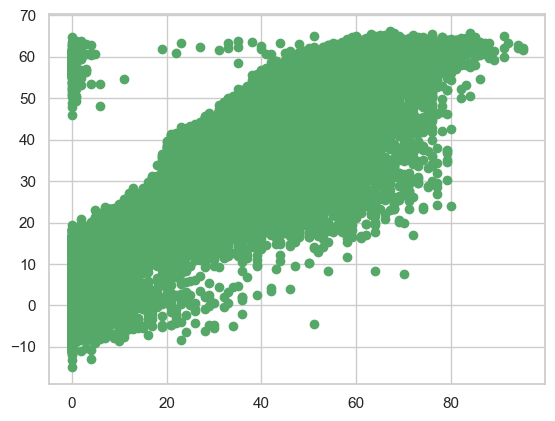

In [ ]:
LinearRegression_model.fit(x_train,y_train)
pred = LinearRegression_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

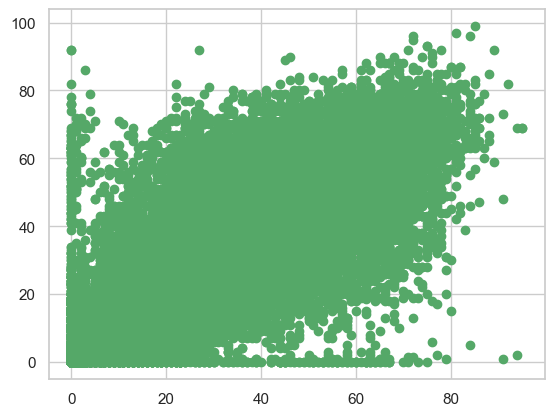

In [ ]:
DecisionTreeRegressor_model.fit(x_train,y_train)
pred = DecisionTreeRegressor_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

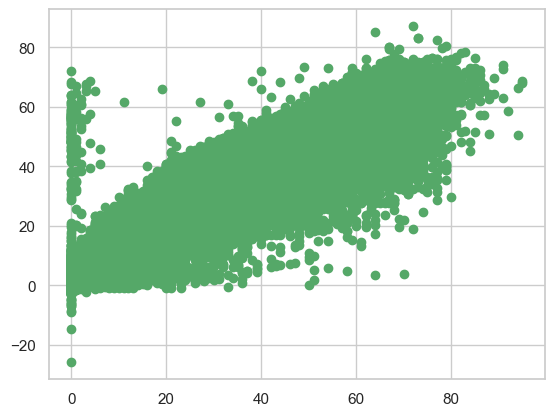

In [ ]:
XGBRegressor_model.fit(x_train,y_train)
pred = XGBRegressor_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

In [ ]:
#with open('XGBRegressor_model.pkl', 'wb') as f:
#    dump(XGBRegressor_model,	f)

In [ ]:
# !jupyter nbconvert --to html "Music_recommendation_system_regression.ipynb"